# Optimizing Marketing Expenses at Yandex.Afisha

This task's goal is to analyse data on marketing expenses and revenues at Yandex.Afisha in order to find out how to optimize marketing expenses. <br> <br>
We have:
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics <br>

We are going to study:
- How people use the product
- When users start to buy
- How much money each customer brings
- When the investments pay off

# Table of Contents

- 1) [Open the data file and study the general information](#1)
<br> <br>
    - 1.1) [Table 'visits'](#1.1)
    - 1.2) [Table 'orders'](#1.2)
    - 1.3) [Table 'costs'](#1.3)
    <br> <br>
- 2) [Prepare the data](#2)
<br> <br>
    - 2.1) [Optimize the Data](#2.1)
    - 2.2) [Replace the column names](#2.2)
    - 2.3) [Check for duplicates](#2.3)
    - 2.4) [Source IDs](#2.4)
    - 2.5) [Visits and Orders timestamps](#2.5)
    <br> <br>
- 3) [Reports and Metrics: Product](#3)
<br> <br>
    - 3.1) [Number of daily, weekly and monthly active users](#3.1)
        - 3.1.1) [Number of daily active users (DAU)](#3.1.1)
        - 3.1.2) [Number of weekly active users (WAU)](#3.1.2)
        - 3.1.3) [Number of monthly active users (MAU)](#3.1.3)
        - 3.1.4) [Average DAU/ WAU/ MAU and sticky factors](#3.1.4)
        <br> <br>
    - 3.2) [Number of sessions per day](#3.2)
        - 3.2.1) [Sessions per day - Distribution](#3.2.1)
        - 3.2.2) [Sessions per day - Dynamics](#3.2.2)
        - 3.2.3) [Sessions per day and user](#3.2.3)
        - 3.2.4) [Sessions per day and user for different devices](#3.2.4)
        <br> <br>
    - 3.3) [The length of each session](#3.3)
        - 3.3.1) [The length of each session - Distribution](#3.3.1)
        - 3.3.2) [The length of each session for different devices](#3.3.2)
        <br> <br>
    - 3.4) [Retention rates](#3.4)
        - 3.4.1) [Retention rates by month of first login](#3.4.1)
        - 3.4.2) [Retention rates by source ID](#3.4.2)
        <br> <br>
- 4) [Reports and Metrics: Sales](#4)
<br> <br>
    - 4.1) [Number of days between registration and first purchase](#4.1)
    - 4.2) [Number of orders](#4.2)
    - 4.3) [Number of purchases per customer](#4.3)
    - 4.4) [Average purchase size](#4.4)
    - 4.5) [Average purchase size - Dynamics](#4.5)
    - 4.6) [Lifetime Values (LTV)](#4.6)
    <br> <br>
- 5) [Reports and Metrics: Marketing](#5)
<br> <br>
    - 5.1) [Money spent overall/ over time/ per source](#5.1)
    <br> <br>
    - 5.2) [Customer acquisition costs (CAC)](#5.2)
        - 5.2.1) [CAC by ad source](#5.2.1)
        - 5.2.2) [CAC over time](#5.2.2)
        <br> <br>
    - 5.3) [Return of marketing investments (ROI)](#5.3)
        - 5.3.1) [ROI by month of first login](#5.3.1)
        - 5.3.2) [ROI by source ID](#5.3.2)
        <br> <br>
- 6) [Overall Conclusion](#6)

<a id="1"></a>

## 1) Open the data file and study the general information

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

<a id="1.1"></a>

### 1.1) Table 'visits'

In [2]:
try:
    visits = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/business_analytics/visits_log_us.csv')
except:
    print("Couldn't read 'visits' csv file.")

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [5]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [6]:
visits['Start Ts'].min()

'2017-06-01 00:01:00'

In [7]:
visits['End Ts'].max()

'2018-06-01 01:26:00'

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


#### Conclusion

The table 'visits' shows the usage of the product by listing information about every single session users made. It has 359400 rows and no missing values. The 'Device' column contains the devices 'desktop' and 'touch'. The column 'Source Id' is an identifier of the ad source the user came from and contains 9 different sources - the numbers 1 to 10 excluding the number 8. The timestamps contain dates between the first of june 2017 and the first of june 2018; all dates are in object data type. The column 'Device' is in object data type as well whereas the Source IDs are integers and the User IDs are in unsigned integer data type.

<a id="1.2"></a>

### 1.2) Table 'orders'

In [9]:
try:
    orders = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/business_analytics/orders_log_us.csv')
except:
    print("Couldn't read 'orders' csv file.")

In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders['Buy Ts'].min()

'2017-06-01 00:10:00'

In [12]:
orders['Buy Ts'].max()

'2018-06-01 00:02:00'

In [13]:
orders['Revenue'].min()

0.0

In [14]:
orders['Revenue'].max()

2633.28

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


#### Conclusion

In the table 'orders' contains data on orders customers made, it has a length of 50415 rows and no missing values. The order timestamps are in the range of the first of june 2017 and the first of june 2018; as well as in the dates in the table 'visits'. The column 'Revenue' contains revenue values between 0 and 2633.28 dollars. Here, the User IDs are also in unsigned integer data type. The revenues are in float data type and the buying timestamps are in object data type.

<a id="1.3"></a>

###  1.3) Table 'costs'

In [16]:
try:
    costs = pd.read_csv('C:/Users/Herbert/Documents/Practicum100/datasets/business_analytics/costs_us.csv')
except:
    print("Couldn't read 'costs' csv file.")

In [17]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [18]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

In [19]:
costs['dt'].min()

'2017-06-01'

In [20]:
costs['dt'].max()

'2018-05-31'

In [21]:
costs['costs'].min()

0.54

In [22]:
costs['costs'].max()

1788.28

In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


#### Conclusion

The table 'costs' shows data on marketing expenses. It has 2542 rows and no missing values. We have source IDs showing the identifiers of the ads in integer data type. The dates of the ads showed are given in the column 'dt' and are given in object data type in the range of 2017-06-01 and 2018-05-31 - this is appropriate to the date ranges in the tables 'visits' and 'orders'. The expenses on this ad source on this day are given in the column 'costs' showing values in the range of 0.54 and 1788.28 dollars; they are in float data type. 

<a id="2"></a>

## 2) Prepare the Data

<a id="2.1"></a>

### 2.1) Optimize the Data

In this section we optimize the tables in terms of minimize their memory sizes.

###### Table 'visits'

In [24]:
# Let's check the real size of the data
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [25]:
# transform the timestamps into datetime data type
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")

In [26]:
# Since the columns 'Device' and 'Source Id' both have less than 10 different elements,
# I transform them into category data type
visits['Device'] = visits['Device'].astype('category')
visits['Source Id'] = visits['Source Id'].astype('category')

In [27]:
# Let's check the reduced size of the data
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null category
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


###### Table 'orders'

In [28]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [29]:
# transform the buying timestamps into datetime data type
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [30]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


###### Table 'costs'

In [31]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [32]:
# transform the timestamps into datetime data type
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y-%m-%d")

# transform source_id into category data type
costs['source_id'] = costs['source_id'].astype('category')

In [33]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null category
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


#### Conclusion

I reduced the data sizes. The column 'Device' in the table 'visits' only consists of 2 different elements ('desktop' and 'touch'), the Source IDs in the tables 'visits' and 'costs' consists of less than 10 different elements, so I transform them into category data type. All timestamps have been transformed into datetime data type. The reduction of the data sizes were successfull: The table 'visits' reduced its size from 79.3 MB to 8.9 MB, the table 'orders' from 4.4 MB to 1.2 MB and the table 'costs' from 206.2 KB to 42.7 KB.

<a id="2.2"></a>

### 2.2) Replace the column names

In [34]:
visits.columns = ['device', 'end_ts', 'ad_source_id', 'start_ts', 'user_id']
orders.columns = ['order_date', 'revenue', 'user_id']
costs.columns = ['ad_source_id', 'ad_date', 'ad_costs']

#### Conclusion

I renamed the columns with names that only consists of lowercase letters since it's easier to work with them. The IDs and the dates have been labeled correctly.

<a id="2.3"></a>

### 2.3) Check for duplicates

In [35]:
visits.duplicated().sum()

0

In [36]:
orders.duplicated().sum()

0

In [37]:
costs.duplicated().sum()

0

#### Conclusion

The tables 'visits', 'orders' and 'costs' have no duplicates and no missing values. All data types are now correct: <br>
All dates and timestamps are given in datetime data type, the source IDs and Devices are given in category data type, the revenues and ad costs are given in float data type and the user IDs are given in unsigned integer data type. 

<a id="2.4"></a>

### 2.4) Source IDs

Regarding source IDs one can find abnormalites that have to be revised.

In [38]:
# Create table with number of ad source IDs for every user
number_of_sources = visits.groupby('user_id').agg({'ad_source_id': 'nunique'}).reset_index()

# rename columns
number_of_sources.columns = ['user_id', 'nunique_sources']

number_of_sources.head()

,user_id,nunique_sources
0,11863502262781,1
1,49537067089222,1
2,297729379853735,1
3,313578113262317,1
4,325320750514679,1


In [39]:
# There are some users with 2 and more different ad sources
number_of_sources['nunique_sources'].value_counts()

1    190449
2     28642
3      6792
4      1761
5       442
6        74
7         9
Name: nunique_sources, dtype: int64

In [40]:
# Number of users
len(number_of_sources)

228169

In [41]:
# Number of users with more than one ad source
len(number_of_sources[number_of_sources['nunique_sources'] > 1])

37720

In [42]:
# create seperate list with all user IDs having more than one ad source ID

multiple_sources_list = []

for i in range(len(number_of_sources)):
    if number_of_sources.loc[i, 'nunique_sources'] >= 2:
        multiple_sources_list.append(number_of_sources.loc[i, 'user_id'])

In [43]:
# For every user ID and source ID we list the minimum starting timestamp at which the session began
# The grouped table only consists of those users that have more than one source ID (query method)

mult_sources_grouped_by_user = \
        visits.query('user_id in @multiple_sources_list').groupby(['user_id', 'ad_source_id']).agg({'start_ts': 'min'})

# All source IDs that are not listed for a certain user will be filled with an obviously late timestamp
mult_sources_grouped_by_user['start_ts'].fillna(pd.to_datetime('2019-01-01', format='%Y-%m-%d'), inplace = True)

# reset index in order to avoid double indexing
mult_sources_grouped_by_user.reset_index(inplace=True)

mult_sources_grouped_by_user.head(10)

,user_id,ad_source_id,start_ts
0,1260655184775459,1,2017-10-23 15:17:00
1,1260655184775459,2,2019-01-01 00:00:00
2,1260655184775459,3,2017-10-23 14:14:00
3,1260655184775459,4,2019-01-01 00:00:00
4,1260655184775459,5,2019-01-01 00:00:00
5,1260655184775459,6,2019-01-01 00:00:00
6,1260655184775459,7,2019-01-01 00:00:00
7,1260655184775459,9,2019-01-01 00:00:00
8,1260655184775459,10,2019-01-01 00:00:00
9,2471247936243530,1,2019-01-01 00:00:00


In [44]:
# create new data frame in which the changes in source IDs are safed
visits_cleaned_ids = visits

In [45]:
# 1) set the index of the grouped table which contains the main source ID of the user as index_min
# 2) safe its corresponding main source ID as earliest_source
# 3) create a list with the indexes of all the sessions a certain user had
# 4) replace the source ID of all sessions with the user's main source ID

for uid in multiple_sources_list:
    index_min = mult_sources_grouped_by_user[mult_sources_grouped_by_user['user_id'] == uid][['start_ts']].idxmin()
    earliest_source = mult_sources_grouped_by_user.loc[index_min, 'ad_source_id'].values[0]
    index_uid_list = list(visits_cleaned_ids[visits_cleaned_ids['user_id'] == uid].index)
    for i in index_uid_list:
        visits_cleaned_ids.loc[i, 'ad_source_id'] = earliest_source

In [211]:
# Check if there are users with multiple sources left

# Create table with number of ad source IDs for every user
number_of_sources_cleaned_ids = visits_cleaned_ids.groupby('user_id').agg({'ad_source_id': 'nunique'}).reset_index()

# rename columns
number_of_sources_cleaned_ids.columns = ['user_id', 'nunique_sources']

# count users for number of sources
number_of_sources_cleaned_ids['nunique_sources'].value_counts()

1    228169
Name: nunique_sources, dtype: int64

#### Conclusion

By grouping the visits table by user IDs and counting the number of unique source IDs we found that there are some users that have more than one source ID. When there are users with more than one session ID and when having different source IDs as cohorts, then I would put one certain user in two cohorts at the same time. I created a reworked version of the table 'visits' which is called 'visits_cleaned_ids'. In the reworked table every user has always the same main source ID for every visit; the main source ID was defined by the source ID of the earliest visit of the user. This new table will be used in the analysis when working with source IDs.

<a id="2.5"></a>

### 2.5) Visits and Orders timestamps

In this section we will check if there is any user ID with order timestamps before the first login timestamps.

In [212]:
# first we will check if there's any order before the first login
# df for giving the first login timestamp for every user in the 'visits_cleaned_ids' table

first_login_date_by_customers = visits.groupby('user_id')['start_ts'].min().reset_index()
first_login_date_by_customers.columns = ['user_id', 'first_login_date']
first_login_date_by_customers.head()

,user_id,first_login_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [213]:
# number of unique users in visits_cleaned_ids table
len(first_login_date_by_customers)

228169

In [214]:
# Here create df with first order timestamp for every user
first_order_date_by_customers = orders.groupby('user_id')['order_date'].min().reset_index()
first_order_date_by_customers.columns = ['user_id', 'first_order_date']
first_order_date_by_customers.head()

,user_id,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [215]:
# number of unique users in orders table
len(first_order_date_by_customers)

36523

In [216]:
# Merge both tables in order to have first order and first login date for each user ID
first_visit_order = first_login_date_by_customers.merge(first_order_date_by_customers, on='user_id', how='left')
first_visit_order.head()

,user_id,first_login_date,first_order_date
0,11863502262781,2018-03-01 17:27:00,NaT
1,49537067089222,2018-02-06 15:55:00,NaT
2,297729379853735,2017-06-07 18:47:00,NaT
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
4,325320750514679,2017-09-30 14:29:00,NaT


In [217]:
# This table has the same length as the table 'first_login_date_by_customers'
len(first_visit_order)

228169

In [218]:
# Check if there's any order before the first login
len(first_visit_order[first_visit_order['first_login_date'] > first_visit_order['first_order_date']])

0

In [219]:
# Check if there's any order and first logins at the same time
len(first_visit_order[first_visit_order['first_login_date'] == first_visit_order['first_order_date']])

2455

In [220]:
# Check the seconds of the timestamps for the first logins
first_visit_order['first_login_date'].dt.second.value_counts()

0    228169
Name: first_login_date, dtype: int64

In [221]:
# Check the seconds of the timestamps for the first orders
first_visit_order['first_order_date'].dt.second.value_counts()

0.0    36523
Name: first_order_date, dtype: int64

#### Conclusion

In this section I tried to find any abnormal timestamps by comparing the timestamp of the first login with the timestamps of the orders for every order users made. I found that there's no order before the first login for every user, but there are 2455 orders that have been made at the same timestamp as the first login. All seconds of the first login timestamps and of the first order timestamps are zero. This big jump from 0 to 2455 could be explained by the fact that all first login and order timestamps are rounded to whole minutes; if someone orders something 20 seconds after the first login, the timestamp of the order might still be the same as the timestamp of the login.

<a id="3"></a>

## 3) Reports and Metrics: Product

<a id="3.1"></a>

### 3.1) Number of daily, weekly and monthly active users

How many people use the product every day, week, and month?

In [222]:
# I create a list containing the index of all rows whose starting timestamp is after the ending timestamp

list_index = []

for i in range(len(visits)):
    if visits.loc[i, 'start_ts'] > visits.loc[i, 'end_ts']:
        list_index.append(i)
        
list_index

[]

In [223]:
# These two rows I delete

visits = visits.drop(list_index)

visits = visits.reset_index(drop = True)

In [224]:
# Let's add helpful columns extracting the year, month, and week from the starting timestamp of the sessions

visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [225]:
# Check the covered time period for visits
visits['session_date'].min()

datetime.date(2017, 6, 1)

In [226]:
visits['session_date'].max()

datetime.date(2018, 5, 31)

In [227]:
# Check the number of unique days in the time period of 365 days
visits['session_date'].nunique()

364

Besides one missing day (365-364 = 1) we have daily data for visits

We investigate 3 important metrics and their dynamics in time:

DAU — the number of daily active users <br>
WAU — the number of weekly active users <br>
MAU — the number of monthly active users

<a id="3.1.1"></a>

#### 3.1.1) Number of daily active users (DAU)

In [228]:
# We create a table with the number of daily active unique users with the corresponding session dates
dau_table = visits.groupby('session_date').agg({'user_id': 'nunique'}).reset_index()

In [229]:
dau_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
session_date    364 non-null object
user_id         364 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [230]:
# session dates transformed to datetime type
dau_table['session_date'] = pd.to_datetime(dau_table['session_date'], format='%Y-%m-%d')

In [231]:
dau_table.head()

,session_date,user_id
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


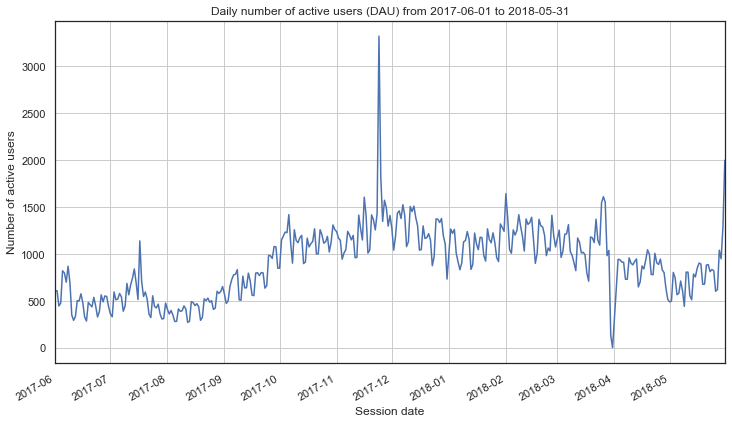

In [232]:
# Plot diagram with DAU values for every session day

dau_table.plot(x='session_date', y='user_id', grid=True, figsize=(12, 7), legend=None)
plt.title("Daily number of active users (DAU) from 2017-06-01 to 2018-05-31")
plt.xlabel("Session date")
plt.ylabel("Number of active users")
plt.show()

In [233]:
# Check minimum and maximum DAU values and dates

print("Minimum number of users:")
print()
print(dau_table[dau_table['user_id'] == dau_table['user_id'].min()])
print()
print()
print("Maximum number of users:")
print()
print(dau_table[dau_table['user_id'] == dau_table['user_id'].max()])

Minimum number of users:

    session_date  user_id
303   2018-03-31        1


Maximum number of users:

    session_date  user_id
176   2017-11-24     3319


##### Conclusion

The graph shows a slightly increasing trend of daily active users beginning at august 2017 and ending at december 2018. The high peak at 2017-11-24 with over 3300 active users was the famous black friday. This high DAU value decreased the day after to standard niveau of approx. 1000 - 1500 daily active users. The product didn't seem to hold the users from black friday since usually I expect an above-average number of customers from the end of november until christmas (2017-12-24) - this can't be observated. The day with minimum users (one user at 2018-03-31) is an outlier; maybe that one user was a programmer repairing the website that was offline that day.

<a id="3.1.2"></a>

#### 3.1.2) Number of weekly active users (WAU)

In [234]:
# We create a table with the number of weekly active unique users with the corresponding session weeks and years
wau_table = visits.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'}).reset_index()

In [235]:
wau_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
session_year    53 non-null int64
session_week    53 non-null int64
user_id         53 non-null int64
dtypes: int64(3)
memory usage: 1.4 KB


In [236]:
# I combine the session year, the week of the year and the number 4 as a string in order to transform that format to datetime
# The number 4 stand for thursday since this is the middle day of a week I use for plotting a graph

wau_table['formatted_date'] = \
        wau_table['session_year'].astype(str) \
        + "-" \
        + wau_table['session_week'].astype(str)\
        + "-4"

wau_table['session_date'] = pd.to_datetime(wau_table['formatted_date'], format='%Y-%W-%w')

In [237]:
wau_table.head()

,session_year,session_week,user_id,formatted_date,session_date
0,2017,22,2021,2017-22-4,2017-06-01
1,2017,23,4129,2017-23-4,2017-06-08
2,2017,24,2812,2017-24-4,2017-06-15
3,2017,25,2878,2017-25-4,2017-06-22
4,2017,26,3064,2017-26-4,2017-06-29


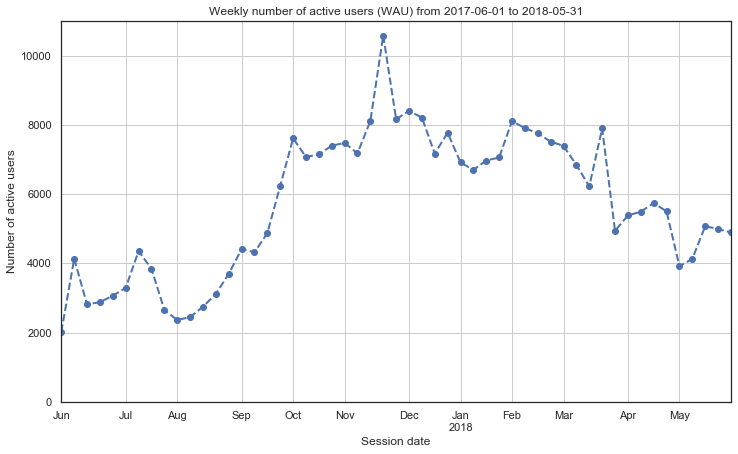

In [238]:
# Plot Diagram with WAU values on the middle of the weeks (thursdays)

wau_table.plot(x='session_date', y='user_id', \
        grid=True, figsize = (12, 7), legend=None, linewidth=2, linestyle='dashed', marker='o')
plt.title("Weekly number of active users (WAU) from 2017-06-01 to 2018-05-31")
plt.xlabel("Session date")
plt.ylabel("Number of active users")
plt.ylim([0, 11000])
plt.show()

##### Conclusion

The WAU graph confirms the observation of an increasing trend from august to december. This graph shows better the decreasing trend beginning in december 2017 (shortly after black friday). The decreasing trend stays until the end of the observed time period.

<a id="3.1.3"></a>

#### 3.1.3) Number of monthly active users (MAU)

In [239]:
# We create a table with the number of monthly active unique users with the corresponding session months and years
mau_table = visits.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'}).reset_index()

In [240]:
# Create string with year and month and transform that string to datetime data type

mau_table['session_date'] = \
        mau_table['session_year'].astype(str) \
        + "-" \
        + mau_table['session_month'].astype(str)\

mau_table['session_date'] = pd.to_datetime(mau_table['session_date'], format='%Y-%m')

In [241]:
mau_table

,session_year,session_month,user_id,session_date
0,2017,6,13259,2017-06-01
1,2017,7,14183,2017-07-01
2,2017,8,11631,2017-08-01
3,2017,9,18975,2017-09-01
4,2017,10,29692,2017-10-01
5,2017,11,32797,2017-11-01
6,2017,12,31557,2017-12-01
7,2018,1,28716,2018-01-01
8,2018,2,28749,2018-02-01
9,2018,3,27473,2018-03-01


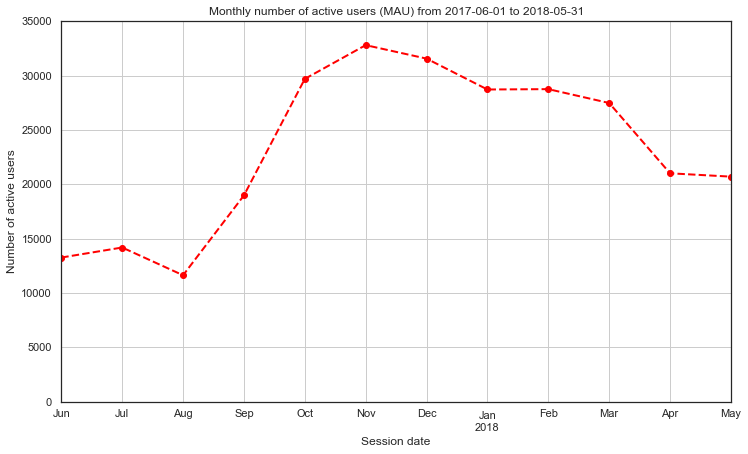

In [242]:
# Plot a diagram with the MAU values for every month

mau_table.plot(x='session_date', y='user_id', \
        figsize = (12, 7), legend=None, linewidth=2, linestyle='dashed', marker='o', color='red')
plt.title("Monthly number of active users (MAU) from 2017-06-01 to 2018-05-31")
plt.xlabel("Session date")
plt.ylabel("Number of active users")
plt.ylim([0, 35000])
plt.grid(True, which="both")
plt.show()

In [243]:
# Check minimum and maximum MAU values and dates

print("Minimum number of users:")
print()
print(mau_table[mau_table['user_id'] == mau_table['user_id'].min()])
print()
print()
print("Maximum number of users:")
print()
print(mau_table[mau_table['user_id'] == mau_table['user_id'].max()])

Minimum number of users:

   session_year  session_month  user_id session_date
2          2017              8    11631   2017-08-01


Maximum number of users:

   session_year  session_month  user_id session_date
5          2017             11    32797   2017-11-01


##### Conclusion

The increasing and decreasing trends described for DAU and WAU graphs can also be seen in the MAU graph. The biggest difference for active users from august (11631 active users) to november (32797 active users) shows that the increasing trend leaded approximately to a three times higher value for MAU. The decreasing trend is slight but constant until the end of the time period.

<a id="3.1.4"></a>

#### 3.1.4) Average DAU/ WAU/ MAU and sticky factors

In [244]:
# Calculate average DAU, WAU and MAU

dau_avg = dau_table['user_id'].mean()
wau_avg = wau_table['user_id'].mean()
mau_avg = mau_table['user_id'].mean()

print("Average DAU: {:.0f}".format(dau_avg))
print("Average WAU: {:.0f}".format(wau_avg))
print("Average MAU: {:.0f}".format(mau_avg))

Average DAU: 908
Average WAU: 5716
Average MAU: 23228


In [245]:
# Calculate sticky factors

sticky_wau = dau_avg/wau_avg
sticky_mau = dau_avg/mau_avg

print("Sticky factor of the weekly audience: {:.1%}".format(sticky_wau))
print("Sticky factor of the monthly audience: {:.1%}".format(sticky_mau))

Sticky factor of the weekly audience: 15.9%
Sticky factor of the monthly audience: 3.9%


##### Conclusion

We estimated the following values: <br> <br>
Average DAU: 908 <br>
Average WAU: 5716 <br>
Average MAU: 23228 <br> <br>
Sticky factor of the weekly audience: 15.9% <br>
Sticky factor of the monthly audience: 3.9% <br> <br>
The percentage of the average number of daily active users in the number of weekly active users (15.9%) is 1.6% above the lowest possible value the sticky factor for weekly audience can have (which is given by 1/7 = 14.3%). That means that there's a small quote of customers that stay active multiple times a week. We also estimated the sticky factor of the monthly audience (3.9%) which is 0.6% above the lowest possible value (1/30 = 3.3%). These sticky factors indicate that the audience's loyalty and activity has room for improvement. Maybe there's a feature that can be added to the website - possibly a 'you might like these products too' feature - so the users get more attracted to it.

<a id="3.2"></a>

### 3.2) Number of sessions per day

How many sessions are there per day? One user might have more than one session.

<a id="3.2.1"></a>

#### 3.2.1) Sessions per day - Distribution

In [246]:
# One user might have more than one session, so we count all user IDs for each date for getting the daily number of sessions
sessions_per_day = visits.groupby('session_date').agg({'user_id': 'count'}).reset_index()

# rename columns
sessions_per_day.columns = ['session_date', 'number_of_sessions']

# transform to datetime
sessions_per_day['session_date'] = pd.to_datetime(sessions_per_day['session_date'], format="%Y-%m-%d")

# print important facts about table
print("The table 'sessions_per_day' has {:.0f} different dates.".format(len(sessions_per_day)))
print("Earliest date:", sessions_per_day.index.min())
print("Latest date:", sessions_per_day.index.max())
print("This corresponds to data of a whole year (besides one missing day).")

The table 'sessions_per_day' has 364 different dates.
Earliest date: 0
Latest date: 363
This corresponds to data of a whole year (besides one missing day).


In [247]:
sessions_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
session_date          364 non-null datetime64[ns]
number_of_sessions    364 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


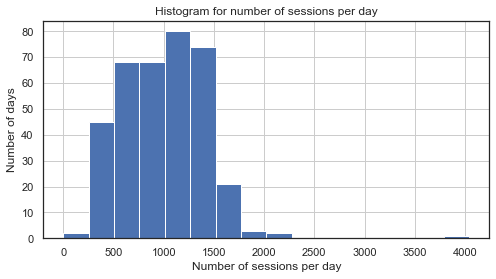

Mean value for number of sessions per day: 987
Median value for number of sessions per day: 1003


In [248]:
# Histogram on sessions per day

sessions_per_day['number_of_sessions'].hist(bins = 16, figsize=(8, 4))
plt.title('Histogram for number of sessions per day')
plt.ylabel('Number of days')
plt.xlabel('Number of sessions per day')
plt.show()

# Mean, median
print("Mean value for number of sessions per day: {:.0f}".format(sessions_per_day['number_of_sessions'].mean()))
print("Median value for number of sessions per day: {:.0f}".format(sessions_per_day['number_of_sessions'].median()))

##### Conclusion

By grouping the session dates of the 'visits' table and counting the number of User IDs for each date, I got a table showing the number of sessions for each day from 2017-06-01 to 2018-05-31 (besides one missing day). Its Histogram presenting the distribution of session per day indicates a left skewed normal distribution; that's why the difference between the mean and median value for sessions per day (mean: 987, median: 1003) is very small. This also shows why there are only very few outliers (as one can see in the histogram).

<a id="3.2.2"></a>

#### 3.2.2) Sessions per day - Dynamics

In [249]:
# We already created a table:

sessions_per_day.head()

,session_date,number_of_sessions
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


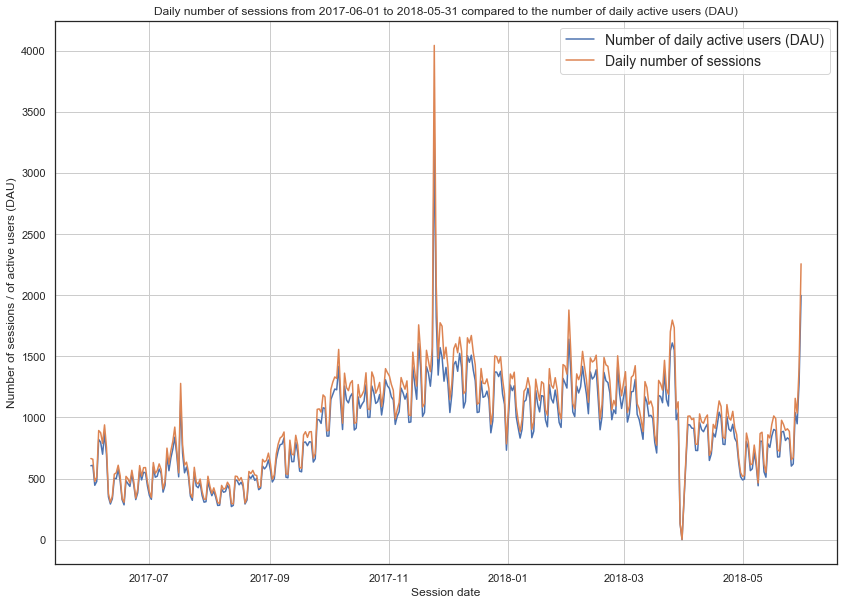

In [250]:
# Plot a diagramm showing the number of sessions per day with session dates as x-axis
# Compare that diagram with the DAU diagram, plot both in one figure

# Both share the same time x-axis
xaxis = sessions_per_day['session_date']

# data for both graphs
data_dau = dau_table['user_id']
data_number = sessions_per_day['number_of_sessions']

plt.figure(figsize=(14, 10))
plt.plot(xaxis, data_dau, label='Number of daily active users (DAU)')
plt.plot(xaxis, data_number, label='Daily number of sessions')
plt.xlabel("Session date")
plt.ylabel("Number of sessions / of active users (DAU)")
plt.title("Daily number of sessions from 2017-06-01 to 2018-05-31 compared to the number of daily active users (DAU)")
plt.grid()
plt.legend(prop={'size': 14})
plt.show()

In [251]:
# Check minimum and maximum number of sessions

print("Minimum number of sessions:")
print()
print(sessions_per_day[sessions_per_day['number_of_sessions'] == sessions_per_day['number_of_sessions'].min()])
print()
print()
print("Maximum number of sessions:")
print()
print(sessions_per_day[sessions_per_day['number_of_sessions'] == sessions_per_day['number_of_sessions'].max()])

Minimum number of sessions:

    session_date  number_of_sessions
303   2018-03-31                   1


Maximum number of sessions:

    session_date  number_of_sessions
176   2017-11-24                4042


##### Conclusion

The graphs showing the DAU and number of sessions yields to a proportional connection between DAU and number of sessions. Both graphs are very similar, this means the most users visit the website only once per day.

<a id="3.2.3"></a>

#### 3.2.3) Sessions per day and user

We will find the average number of sessions per user for every day.

In [252]:
# Join DAU values with number of sessions by session dates

sessions_per_user_table = dau_table.merge(sessions_per_day, on='session_date')

# Add column 'mean_sessions_per_user' by dividing number of sessions with DAU

sessions_per_user_table['mean_sessions_per_user'] = \
        sessions_per_user_table['number_of_sessions'] / sessions_per_user_table['user_id']

In [253]:
sessions_per_user_table.head()

,session_date,user_id,number_of_sessions,mean_sessions_per_user
0,2017-06-01,605,664,1.097521
1,2017-06-02,608,658,1.082237
2,2017-06-03,445,477,1.071910
3,2017-06-04,476,510,1.071429
4,2017-06-05,820,893,1.089024


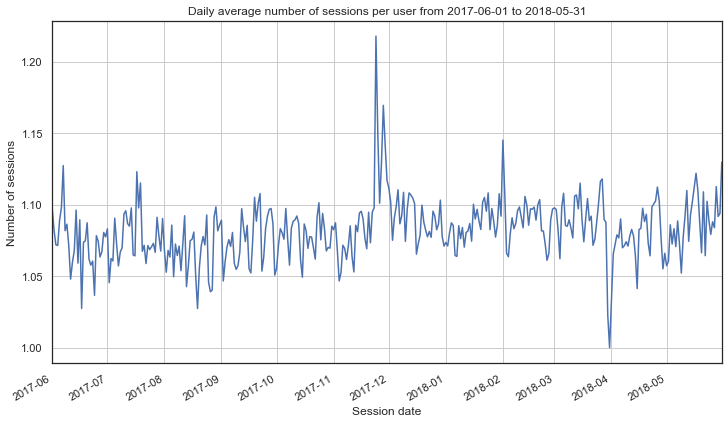

In [254]:
# Plot a diagramm showing the average number of sessions per user for every day

sessions_per_user_table.plot(x='session_date', y='mean_sessions_per_user', grid=True, figsize=(12, 7), legend=None)
plt.title("Daily average number of sessions per user from 2017-06-01 to 2018-05-31")
plt.xlabel("Session date")
plt.ylabel("Number of sessions")
plt.show()

In [255]:
# Check minimum and maximum number of sessions per user

print("Minimum number of sessions per user and day:")
print()
print(sessions_per_user_table \
      [sessions_per_user_table['mean_sessions_per_user'] == sessions_per_user_table['mean_sessions_per_user'].min()])
print()
print()
print("Maximum number of sessions per user and day:")
print()
print(sessions_per_user_table \
      [sessions_per_user_table['mean_sessions_per_user'] == sessions_per_user_table['mean_sessions_per_user'].max()])
print()
print()
print("Mean value for number of sessions per user and day: {:.3f}" \
        .format(sessions_per_user_table['mean_sessions_per_user'].mean()))

Minimum number of sessions per user and day:

    session_date  user_id  number_of_sessions  mean_sessions_per_user
303   2018-03-31        1                   1                     1.0


Maximum number of sessions per user and day:

    session_date  user_id  number_of_sessions  mean_sessions_per_user
176   2017-11-24     3319                4042                1.217837


Mean value for number of sessions per user and day: 1.082


##### Conclusion

The graph for average number of sessions per user shows - besides the outliers at black friday and at 2017-31-03 - that this value is pretty constant over the year. Roughly seen, there are between 1.05 and 1.10 sessions per user and day over the observed year. The daily mean value over the year is 1.08 sessions per user and is in the range of 1.05 and 1.10. The average value can be imagined the following way: From 100 different users on one day there are on in average 108 sessions; so there are not more than 8 users that visited the website at least two times on that day.

<a id="3.2.4"></a>

#### 3.2.4) Sessions per day and user for different devices

In [256]:
# count sessions for every date seperately for 'touch' and 'desktop' device and create pivot table
sessions_devices = visits.pivot_table(index='session_date', columns='device', aggfunc={'user_id': 'count'})

# rename columns
sessions_devices.columns = ['desktop_count', 'touch_count']

# reset index
sessions_devices = sessions_devices.reset_index()

# transform new column to datetime data type
sessions_devices['session_date'] = pd.to_datetime(sessions_devices['session_date'], format="%Y-%m-%d")

sessions_devices.head()

,session_date,desktop_count,touch_count
0,2017-06-01,501.0,163.0
1,2017-06-02,498.0,160.0
2,2017-06-03,329.0,148.0
3,2017-06-04,349.0,161.0
4,2017-06-05,693.0,200.0


In [257]:
# Create a similar table but with the unique number of users (DAU)

# pivot table for different devices
dau_devices = visits.pivot_table(index='session_date', columns='device', aggfunc={'user_id': 'nunique'})

# rename columns
dau_devices.columns = ['desktop_dau', 'touch_dau']

# reset index
dau_devices = dau_devices.reset_index()

# transform new column to datetime data type
dau_devices['session_date'] = pd.to_datetime(dau_devices['session_date'], format="%Y-%m-%d")

dau_devices.head()

,session_date,desktop_dau,touch_dau
0,2017-06-01,455.0,153.0
1,2017-06-02,458.0,152.0
2,2017-06-03,307.0,139.0
3,2017-06-04,326.0,153.0
4,2017-06-05,631.0,195.0


In [258]:
# Join DAU values with number of sessions by session dates

sessions_per_user_devices = sessions_devices.merge(dau_devices, on='session_date')

# Add columns 'mean_sessions_per_user_desktop' and 'mean_sessions_per_user_touch'

sessions_per_user_devices['mean_sessions_per_user_touch'] = \
        sessions_per_user_devices['touch_count'] / sessions_per_user_devices['touch_dau']

sessions_per_user_devices['mean_sessions_per_user_desktop'] = \
        sessions_per_user_devices['desktop_count'] / sessions_per_user_devices['desktop_dau']

In [259]:
sessions_per_user_devices.head()

,session_date,desktop_count,touch_count,desktop_dau,touch_dau,mean_sessions_per_user_touch,mean_sessions_per_user_desktop
0,2017-06-01,501.0,163.0,455.0,153.0,1.065359,1.101099
1,2017-06-02,498.0,160.0,458.0,152.0,1.052632,1.087336
2,2017-06-03,329.0,148.0,307.0,139.0,1.064748,1.071661
3,2017-06-04,349.0,161.0,326.0,153.0,1.052288,1.070552
4,2017-06-05,693.0,200.0,631.0,195.0,1.025641,1.098257


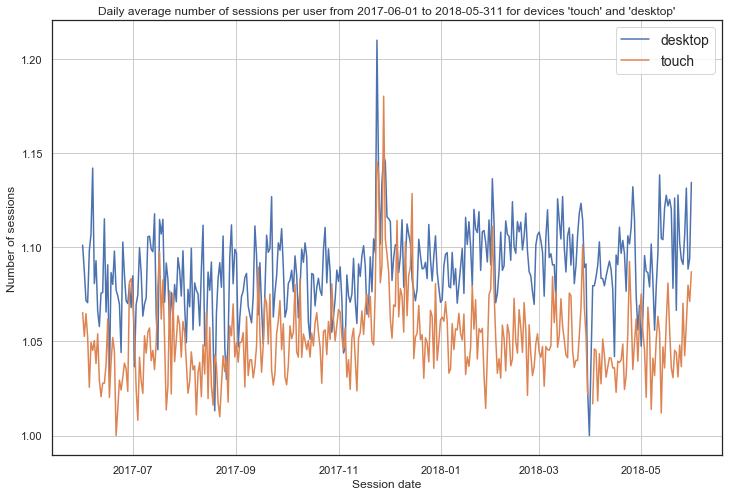

In [260]:
# Plot a diagramm showing the average number of sessions per user for every day for each device

xaxis = sessions_per_user_devices['session_date']
data_desktop = sessions_per_user_devices['mean_sessions_per_user_desktop']
data_touch = sessions_per_user_devices['mean_sessions_per_user_touch']

plt.figure(figsize=(12, 8))
plt.plot(xaxis, data_desktop, label='desktop', linewidth=1.5)
plt.plot(xaxis, data_touch, label='touch', linewidth=1.5)
plt.xlabel("Session date")
plt.ylabel("Number of sessions")
plt.title("Daily average number of sessions per user from 2017-06-01 to 2018-05-311 for devices 'touch' and 'desktop'")
plt.grid()
plt.legend(prop={'size': 14})
plt.show()

In [261]:
# Get mean values, total numbers and standard deviations for both devices

print("Desktop device - Number of sessions per user and day:")
print("Mean value: {:.3f}".format(data_desktop.mean()))
print("Standard deviation: {:.3f}".format(data_desktop.std()))
print()
print("Touch device - Number of sessions per user and day:")
print("Mean value: {:.3f}".format(data_touch.mean()))
print("Standard deviation: {:.3f}".format(data_touch.std()))
print()
print("All devices - Number of sessions per user and day:")
print("Mean value: {:.3f}".format(sessions_per_user_table['mean_sessions_per_user'].mean()))
print("Standard deviation: {:.3f}".format(sessions_per_user_table['mean_sessions_per_user'].std()))
print()
print("Number of sessions with desktop device: {:.0f}".format(sessions_per_user_devices['desktop_count'].sum()))
print("Number of sessions with touch device:    {:.0f}".format(sessions_per_user_devices['touch_count'].sum()))
print("Number of sessions with all devices:    {:.0f}".format(sessions_per_user_table['number_of_sessions'].sum()))

Desktop device - Number of sessions per user and day:
Mean value: 1.089
Standard deviation: 0.022

Touch device - Number of sessions per user and day:
Mean value: 1.051
Standard deviation: 0.021

All devices - Number of sessions per user and day:
Mean value: 1.082
Standard deviation: 0.021

Number of sessions with desktop device: 262565
Number of sessions with touch device:    96833
Number of sessions with all devices:    359398


##### Conclusion

The average number of sessions per user and day for desktop device (1.09) is higher than the one for touch device (1.05) - but that's only a small difference. This small difference is solid between the devices, this can not only be seen in the graphs but also in the small standard deviations (0.02). The total average value (1.08) is near by the value for desktop since we have more desktop sessions (262,565) than touch sessions (96,833). That means that for average number of sessions per user and for total number of sessions the desktop is the dominating device.

<a id="3.3"></a>

### 3.3) The length of each session

<a id="3.3.1"></a>

#### 3.3.1) The length of each session - Distribution

In [262]:
# Let's add the column 'session_duration_sec' giving us the session durations in seconds

visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [263]:
# Minimum and maximum value

print("Minimum duration:", visits['session_duration_sec'].min())
print("Maximum duration:", visits['session_duration_sec'].max())

Minimum duration: 0
Maximum duration: 42660


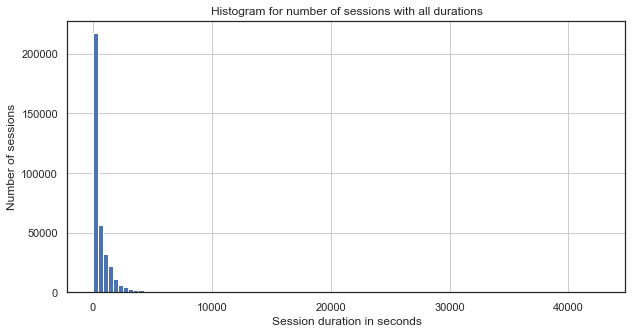

This Histogram shows a non-normal distribution of session durations, having it's peak for a very short duration
and decreasing fastly for longer durations.


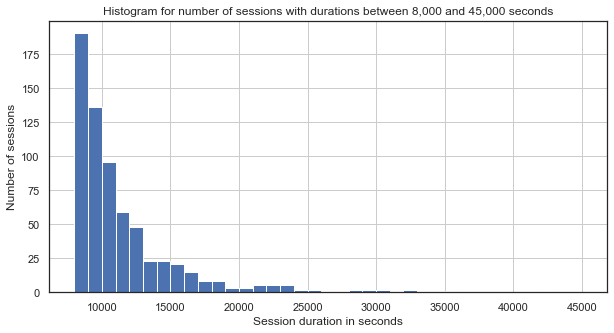

In [264]:
# Histogram showing number of sessions for all durations

visits['session_duration_sec'].hist(bins=100, figsize=(10, 5))
plt.title('Histogram for number of sessions with all durations')
plt.ylabel('Number of sessions')
plt.xlabel('Session duration in seconds')
plt.show()

print("This Histogram shows a non-normal distribution of session durations, having it's peak for a very short duration")
print("and decreasing fastly for longer durations.")

# Histogram for range 8,000 to 45,000 seconds

visits['session_duration_sec'].hist(bins=37, figsize=(10, 5), range=(8000, 45000))
plt.title('Histogram for number of sessions with durations between 8,000 and 45,000 seconds')
plt.ylabel('Number of sessions')
plt.xlabel('Session duration in seconds')
plt.show()

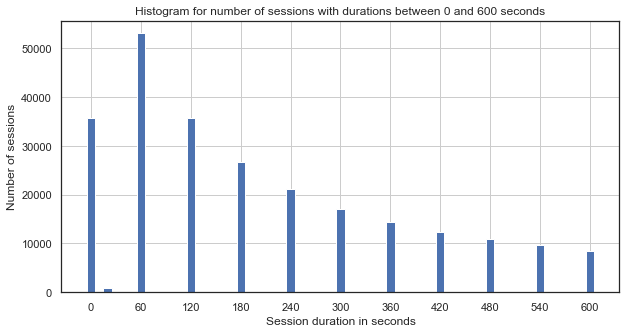

This Histogram shows that the large part of session shorter than 10 minutes is rounded into whole minutes
(besides the small bin between 0 and 60 seconds). The peak is already reached for 60 seconds and the durations
decrease fastly for longer durations.


In [265]:
# Histogram for number of sessions with durations in the range of 0 to 600 seconds

# Every bin stands for a time period of 10 seconds
visits['session_duration_sec'].hist(bins=61, range=(-5, 605), figsize=(10, 5))
plt.title('Histogram for number of sessions with durations between 0 and 600 seconds')
plt.ylabel('Number of sessions')
# See xticks for every whole minute
plt.xticks([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600])
plt.xlabel('Session duration in seconds')
plt.show()

print("This Histogram shows that the large part of session shorter than 10 minutes is rounded into whole minutes")
print("(besides the small bin between 0 and 60 seconds). The peak is already reached for 60 seconds and the durations")
print("decrease fastly for longer durations.")

In [266]:
# There is a very small bin between 0 and 60 seconds,
# let's count the sessions with a duration between 0 and 300 seconds

print(visits[visits['session_duration_sec'] <= 300] \
      .loc[:, 'session_duration_sec'].value_counts().sort_index())
print()
print("There are only 868 sessions not being rounded to 0 or 1 minutes; they are exactly determined with 19 seconds.")
print("That's a very small number of sessions compared to the number of rounded durations.")

0      35794
19       868
60     53029
120    35748
180    26672
240    21085
300    17005
Name: session_duration_sec, dtype: int64

There are only 868 sessions not being rounded to 0 or 1 minutes; they are exactly determined with 19 seconds.
That's a very small number of sessions compared to the number of rounded durations.


In [267]:
# Average session length (ASL)
# The distributions of the session durations are not even close to normal, so we calculate the mode to find the ASL

ASL = visits['session_duration_sec'].mode()[0]

print("Average session length (ASL) in seconds:", ASL)
print()
print("Here, we calculated the mode of the session durations. In the Histogram showing the duration until 600 seconds, we")
print("determined that the peak is given with 60 seconds. The mode value of 60 seconds confirm that observation.")

Average session length (ASL) in seconds: 60

Here, we calculated the mode of the session durations. In the Histogram showing the duration until 600 seconds, we
determined that the peak is given with 60 seconds. The mode value of 60 seconds confirm that observation.


In [268]:
# Let's take a look at statistical values for sessions lengths:

visits['session_duration_sec'].describe().apply("{:.0f}".format)

count    359398
mean        643
std         997
min           0
25%         120
50%         300
75%         840
max       42660
Name: session_duration_sec, dtype: object

##### Conclusion

The Histograms for session durations show that their distribution is non-normal and has some big outliers - maybe some users don't log out after finishing the session and don't switch off the device. This trend shown in the histograms lead to a big difference between mean value (643 sec) and median value (300 sec)  and a big standard deviation (997 sec) for session lengths. Plotting another histogram for the range of 0 to 600 seconds, we determined that the large part of sessions in that range is rounded to full minutes. The most session durations are given with 1 minute (60 seconds); so we used the mode method to calculate the average session length which confirmed that obsveration. So we can say that the amount of time users spend with the product is in average 1 minute per session. <br> <br> What are the reasons for the big decreasing trend for sessions longer than 1 minute? A hypothesis is that the mobile version of the product is hard to use, so smartphone and tablet sessions end up being very short; we will take a closer look at this hypothesis in the following section.

<a id="3.3.2"></a>

#### 3.3.2) The length of each session for different devices

We determine the length of each session for the different devices 'touch' and 'desktop'.

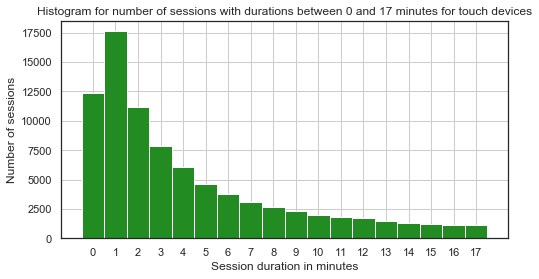

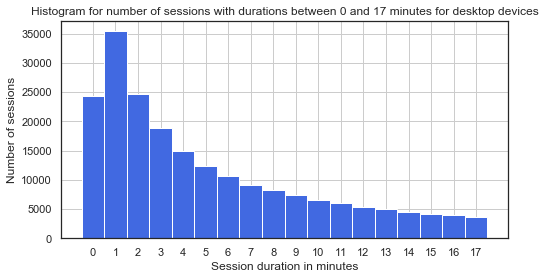

In [269]:
# List with ticks for x axis
x_ticks = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020]

# list with corresponding values in minutes
x_ticks_minutes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# List with ticks for bins
x_bins = [-30, 30, 90, 150, 210, 270, 330, 390, 450, 510, 570, 630, 690, 750, 810, 870, 930, 990, 1050]


# Histogram showing number of sessions with durations in the range of 0 to 1020 seconds (17 minutes) for touch devices
visits[visits['device'] == 'touch'].loc[:, 'session_duration_sec'].hist(range=(-30, 1050), bins=x_bins, figsize=(8, 4), \
                                                                        color='forestgreen')
plt.title('Histogram for number of sessions with durations between 0 and 17 minutes for touch devices')
plt.ylabel('Number of sessions')
plt.xlabel('Session duration in minutes')
plt.xticks(x_ticks, x_ticks_minutes)
plt.show()

 
# Histogram showing number of sessions with durations in the range of 0 to 1020 seconds  (17 minutes) for desktop devices
visits[visits['device'] == 'desktop'].loc[:, 'session_duration_sec'].hist(range=(-30, 1050), bins=x_bins, figsize=(8, 4),\
                                                                          color='royalblue')
plt.title('Histogram for number of sessions with durations between 0 and 17 minutes for desktop devices')
plt.ylabel('Number of sessions')
plt.xlabel('Session duration in minutes')
plt.xticks(x_ticks, x_ticks_minutes)
plt.show()

##### Conclusion

Plotting Histograms, we can get a picture of the trends for number of sessions for different session durations in whole minutes; so we can compare the trends for both devices: <br> The trends in the Histograms for desktop and touch devices in the first 17 minutes look very similar. Both have their peak at 1 minute and a strong decreasing trend as we estimated in the Histogram in the section before including all devices. As a result, my hypothesis that the mobile version of the product is hard to use - so smartphone and tablet sessions end up being very short - is very unlikely. 

<a id="3.4"></a>

### 3.4) Retention rates

In the second subsection 'Retention rates by source ID' the cohorts are the Source IDs. That's why we use the table 'visits_cleaned_ids' instead of 'visits'.

<a id="3.4.1"></a>

#### 3.4.1) Retention rates by month of first login

In [270]:
# Create new data frame for calculating retention rates

# first visit timestamp for every user in a seperate table
first_login_ts = visits_cleaned_ids.groupby(['user_id'])['start_ts'].min()
first_login_ts.name = 'first_login_ts'

first_login_ts

user_id
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_login_ts, Length: 228169, dtype: datetime64[ns]

In [271]:
# add information about the first session to the dataframe with visitors
df_retention = visits_cleaned_ids.join(first_login_ts, on='user_id')

print("Length of table 'visits_cleaned_ids':", len(visits_cleaned_ids))
print()
print("Length of table 'df_retention':", len(df_retention))
print()
print("Both tables have the same length.")

df_retention.head()

Length of table 'visits_cleaned_ids': 359400

Length of table 'df_retention': 359400

Both tables have the same length.


,device,end_ts,ad_source_id,start_ts,user_id,first_login_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,4,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00


In [272]:
# for the convenience of grouping add month columns
df_retention['first_login_month'] = df_retention['first_login_ts'].astype('datetime64[M]')
df_retention['first_login_month_str'] = df_retention['first_login_month'].dt.strftime('%Y-%m')
df_retention['session_month'] = df_retention['start_ts'].astype('datetime64[M]')

# create column that gives the number of months between first login month and month of session
df_retention['lifetime_month'] = (df_retention['session_month'] - df_retention['first_login_month']) / np.timedelta64(1, 'M')
df_retention['lifetime_month'] = df_retention['lifetime_month'].round().astype('int')

df_retention.head()

,device,end_ts,ad_source_id,start_ts,user_id,first_login_ts,first_login_month,first_login_month_str,session_month,lifetime_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01,2017-12,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01,2018-02,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07,2017-07-01,0
3,desktop,2018-05-20 11:23:00,4,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03-01,2018-03,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-01,2017-12,2017-12-01,0


In [273]:
# Group every visit by first months of login and by lifetime months since we will create a pivot table
cohorts = df_retention.groupby(['first_login_month_str', 'lifetime_month']).agg({'user_id': 'nunique'}).reset_index()

# rename columns 
cohorts.columns = ['Month of first login', 'Lifetime in months', 'user_id']

cohorts.head()

,Month of first login,Lifetime in months,user_id
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909


In [274]:
# The initial cohort sizes can be estimated by picking the number of unique users from lifetime month 0
initial_users_count = cohorts[cohorts['Lifetime in months'] == 0][['Month of first login', 'user_id']]

# rename columns
initial_users_count.columns = ['Month of first login', 'cohort_users']

initial_users_count

,Month of first login,cohort_users
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [275]:
# Add the cohort sizes to 'cohorts' as 'cohort_users'
cohorts = cohorts.merge(initial_users_count, on='Month of first login')

# Retention rates in percent by dividing the number of users coming back by the initial cohort size
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users'] *100

cohorts.head()

,Month of first login,Lifetime in months,user_id,cohort_users,retention
0,2017-06,0,13259,13259,100.000000
1,2017-06,1,1043,13259,7.866355
2,2017-06,2,713,13259,5.377479
3,2017-06,3,814,13259,6.139226
4,2017-06,4,909,13259,6.855721


In [276]:
# Create pivot table with months of first login as cohorts

retention_month_pivot = cohorts.pivot_table(
        index='Month of first login',
        columns='Lifetime in months',
        values='retention',
        aggfunc='sum')

In [277]:
# average retention rates for all lifetime months:
print("Average retention rate for cohort lifetimes in months:")
for i in range(0,12):
    print("Month", i, ":", "{:.2%}".format(retention_month_pivot[i].mean() / 100))

Average retention rate for cohort lifetimes in months:
Month 0 : 100.00%
Month 1 : 6.52%
Month 2 : 4.63%
Month 3 : 4.28%
Month 4 : 4.06%
Month 5 : 3.94%
Month 6 : 3.70%
Month 7 : 3.75%
Month 8 : 3.55%
Month 9 : 3.52%
Month 10 : 3.41%
Month 11 : 4.50%


For the first eleven months in lifetimes we have a decreasing trend for the monthly average retention rate. We start with a rate of 6.52% and in lifetime month 10 we have the lowest rate given by 3.41%. After that month, the rate increases about 1.1% to 4.50%. 

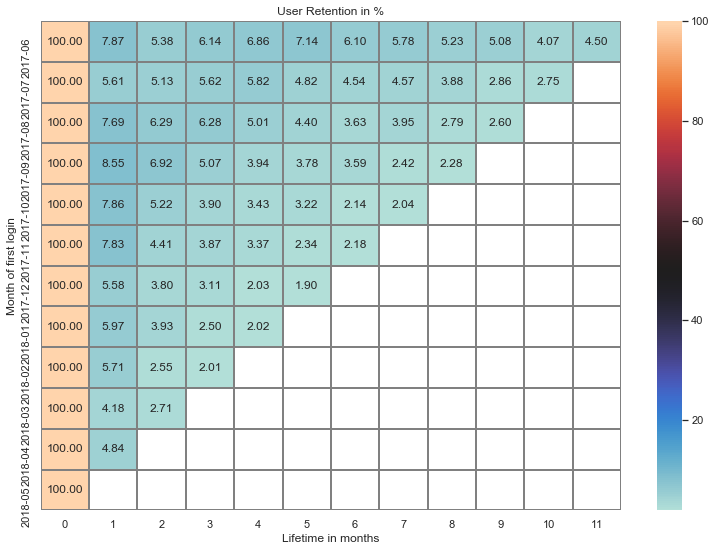

In [278]:
# Plot that pivot table with colors to visualize better the differences in retention rates

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('User Retention in %')
sns.heatmap(retention_month_pivot, \
            annot=True, \
            fmt='.2f', \
            linewidths=1, \
            linecolor='gray', \
            center = 50) 

##### Conclusion

For the first lifetime month the retention rates vary between 4.18% for the march cohort and 8.55% for the september cohort. The june cohort stands out by showing an increasing trend from the second lifetime month (5.38%) to the fifth lifetime month (7.14%); this applies also to the july cohort with an increasing trend between lifetime month 2 and (from 5.13% to 5.82%). For all other 10 cohorts we only have decreasing trends starting from the lifetime month 0. Also an outstanding value is the rate of 4.50% for the june cohort in the last lifetime month. That value is much higher than those for the last months of other cohorts (besides the april 2018 cohort (4.84%) - but the cohort only has a lifetime of 1 month). This observation confirms the increase from 3.41% to 4.50% in average retention rate from the 11th to the 12th lifetime month. 

<a id="3.4.2"></a>

#### 3.4.2) Retention rates by source ID

In [279]:
# create cohorts table grouping by lifetime months and source IDs
cohorts_source_month = df_retention.groupby(['ad_source_id', 'lifetime_month']).agg({'user_id': 'nunique'}).reset_index()

# rename columns
cohorts_source_month.columns = ['Source ID', 'Lifetime month', 'user_id']

In [280]:
# create initial cohort sizes as df
initial_users_count_source_month = cohorts_source_month[cohorts_source_month['Lifetime month'] == 0][['Source ID', 'user_id']]

# rename columns
initial_users_count_source_month.columns = ['Source ID', 'cohort_users']

initial_users_count_source_month

,Source ID,cohort_users
0,1,9469
12,2,17616
24,3,66116
36,4,72346
48,5,49237
60,6,2
61,7,32
64,9,6448
76,10,6903


In [281]:
# merge cohorts table with initial cohort sizes
cohorts_source_month = cohorts_source_month.merge(initial_users_count_source_month, on='Source ID')

# calculate retention rates in percent
cohorts_source_month['retention'] = cohorts_source_month['user_id'] / cohorts_source_month['cohort_users'] *100

cohorts_source_month.head()

,Source ID,Lifetime month,user_id,cohort_users,retention
0,1,0,9469,9469,100.000000
1,1,1,954,9469,10.074982
2,1,2,565,9469,5.966839
3,1,3,411,9469,4.340479
4,1,4,337,9469,3.558982


In [282]:
# check number of cohort users for source ID '6' and '7'
cohorts_source_month[(cohorts_source_month['Source ID'] == 6) | (cohorts_source_month['Source ID'] == 7)]

,Source ID,Lifetime month,user_id,cohort_users,retention
60,6,0,2,2,100.000
61,7,0,32,32,100.000
62,7,2,1,32,3.125
63,7,3,1,32,3.125


In [283]:
# there are only two resp. 32 users, so we delete these rows
cohorts_source_month = cohorts_source_month\
        [(cohorts_source_month['Source ID'] != 6) & (cohorts_source_month['Source ID'] != 7)]

In [284]:
# create pivot table with source IDs as cohorts and retention rates
retention_source_month_pivot = cohorts_source_month.pivot_table(
        index='Source ID',
        columns='Lifetime month',
        values='retention',
        aggfunc='sum')

In [285]:
# choose certain days of retention to observe
retention_days_list = [0, 1, 2, 3, 4, 7, 14, 30, 60, 90]

In [286]:
# create columns with dates in order to calculate retention days
df_retention['session_date'] = df_retention['start_ts'].dt.date
df_retention['session_date'] = pd.to_datetime(df_retention['session_date'], format='%Y-%m-%d')
df_retention['first_login_date'] = df_retention['first_login_ts'].dt.date
df_retention['first_login_date'] = pd.to_datetime(df_retention['first_login_date'], format='%Y-%m-%d')

# calculate retention days
df_retention['retention_days'] = (df_retention['session_date'] - df_retention['first_login_date']) / np.timedelta64(1, 'D')
df_retention['retention_days'] = df_retention['retention_days'].round().astype('int')

df_retention.head(4)

,device,end_ts,ad_source_id,start_ts,user_id,first_login_ts,first_login_month,first_login_month_str,session_month,lifetime_month,session_date,first_login_date,retention_days
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01,2017-12,2017-12-01,0,2017-12-20,2017-12-20,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01,2018-02,2018-02-01,0,2018-02-19,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,4,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03-01,2018-03,2018-05-01,2,2018-05-20,2018-03-09,72


In [287]:
# Create similar tables as in the task before, but now we have retention days instead of lifetime months

# create cohorts table grouping by retention days and source IDs
cohorts_source = df_retention \
        .query('retention_days in @retention_days_list') \
        .groupby(['ad_source_id', 'retention_days']).agg({'user_id': 'nunique'}).reset_index()

# rename columns
cohorts_source.columns = ['Source ID', 'Retention days', 'user_id']

In [288]:
# create initial cohort sizes as df
initial_users_count_source = cohorts_source[cohorts_source['Retention days'] == 0][['Source ID', 'user_id']]

# rename columns
initial_users_count_source.columns = ['Source ID', 'cohort_users']

initial_users_count_source

,Source ID,cohort_users
0,1,9469
10,2,17616
20,3,66116
30,4,72346
40,5,49237
50,6,2
51,7,32
53,9,6448
63,10,6903


In [289]:
# merge cohorts table with initial cohort sizes
cohorts_source = cohorts_source.merge(initial_users_count_source, on='Source ID')

# calculate retention rates in percent
cohorts_source['retention'] = cohorts_source['user_id'] / cohorts_source['cohort_users'] *100

cohorts_source.head()

,Source ID,Retention days,user_id,cohort_users,retention
0,1,0,9469,9469,100.000000
1,1,1,560,9469,5.914035
2,1,2,287,9469,3.030943
3,1,3,215,9469,2.270567
4,1,4,198,9469,2.091034


In [290]:
# check number of cohort users for source ID '6' and '7'
cohorts_source[(cohorts_source['Source ID'] == 6) | (cohorts_source['Source ID'] == 7)]

,Source ID,Retention days,user_id,cohort_users,retention
50,6,0,2,2,100.000
51,7,0,32,32,100.000
52,7,4,1,32,3.125


In [291]:
# there are only two resp. 32 users, so we delete these two rows
cohorts_source = cohorts_source[(cohorts_source['Source ID'] != 6) & (cohorts_source['Source ID'] != 7)]

In [292]:
# create pivot table with source IDs as cohorts and retention rates
retention_source_pivot = cohorts_source.pivot_table(
        index='Source ID',
        columns='Retention days',
        values='retention',
        aggfunc='sum')

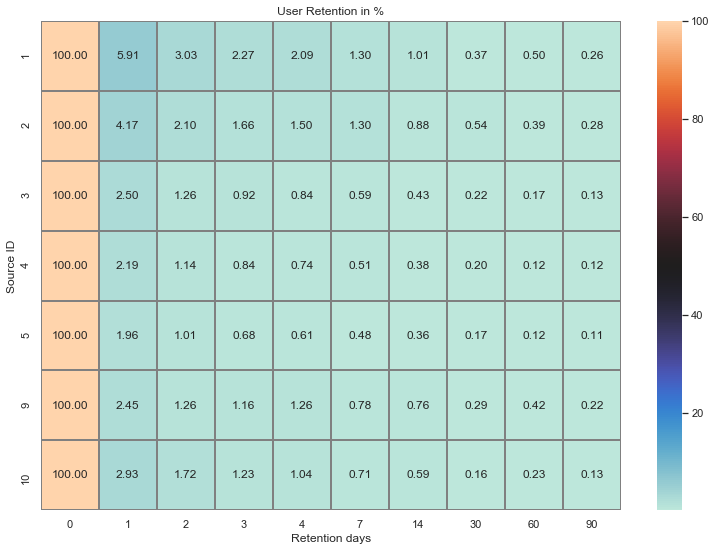

In [293]:
# Plot pivot table having retention days
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('User Retention in %')
sns.heatmap(retention_source_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', center=50) 

We look at the table with retention days: <br> All source IDs have a decreasing trend in retention rates by increasing days. For the listed retention days 1, 2, 3, 4 and 14 the retention rate has its highest value for source ID 1. This source IDs 1 and 2 have significantly high values for retention day 1 and 2 given by 5.91% (day 1) and 3.03% (day 2) for ID 1 and by 4.17% (day 1) and by 2.10% (day 2) for ID 2. But also for all other listed retention days the IDs 1 or 2 always have the highest retention rate for every listed retention day compared to other IDs. <br>
Besides the source IDs 1 and 2, for the time shortly after registration (days 1, 2 and 3) the highest rates are given for source ID 10, but for later times (days 4, 7, 14, 30, 60 and 90) the highest rates are given for source ID 9.

In [294]:
print("Average Retention Rate for the second lifetime month: {:.2f}%".format(retention_source_month_pivot[1].mean()))

Average Retention Rate for the second lifetime month: 7.45%


In [295]:
# average retention rates for all lifetime months:
print("Average retention rate for source ID cohort lifetimes in months:")
for i in range(0,12):
    print("Month", i, ":", "{:.2%}".format(retention_source_month_pivot[i].mean() / 100))

Average retention rate for source ID cohort lifetimes in months:
Month 0 : 100.00%
Month 1 : 7.45%
Month 2 : 4.84%
Month 3 : 3.75%
Month 4 : 3.16%
Month 5 : 2.64%
Month 6 : 2.01%
Month 7 : 1.56%
Month 8 : 1.11%
Month 9 : 0.81%
Month 10 : 0.56%
Month 11 : 0.40%


When having source IDs as cohorts, one can observe a decreasing trend for the average retention rate from the first to the last lifetime month. The highest value in the beginning is given by 7.45% and in the last month given by 0.40%.

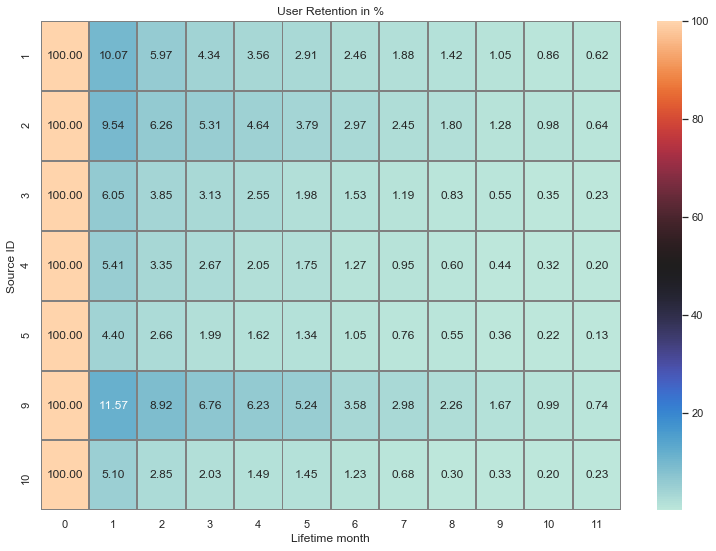

In [296]:
# Plot pivot table having month lifetimes
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('User Retention in %')
sns.heatmap(retention_source_month_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', center=50)

##### Conclusion

Beginning from the first lifetime month, all source IDs show a decreasing trend in retention rates. For all lifetime months source ID 9 has the highest values for retention rates; its highest value is 11.57% for the first month. Comparing source IDs 1 and 2, in the first month ID 1 has a higher rate (10.07%) than ID 2 (9.54%), but for all the other months ID 2 has higher rates than ID 1. The 10th lifetime month is the first month where the rates for all IDs are below 1% (highest rate for month 10: 0.99% for source ID 9).

<a id="4"></a>

## 4) Reports and Metrics: Sales

<a id="4.1"></a>

### 4.1) Number of days between registration and first purchase

We will investigate the number of days between first login and first order (conversion) for different cohorts (month of first login).

In [297]:
# table with first login date by user ID
first_login_date_by_customers = visits.groupby('user_id')['start_ts'].min().reset_index()

# rename columns
first_login_date_by_customers.columns = ['user_id', 'first_login_date']

In [298]:
# table with first order date by user ID
first_order_date_by_customers = orders.groupby('user_id')['order_date'].min().reset_index()

# rename columns
first_order_date_by_customers.columns = ['user_id', 'first_order_date']

In [299]:
# merge these two tables, leave only those users (rows) who ordered something (by inner merging)
conversion_table = first_order_date_by_customers.merge(first_login_date_by_customers, on='user_id')

In [300]:
# Add column with first login month
conversion_table['first_login_month'] = conversion_table['first_login_date'].astype('datetime64[M]')

# Add column with first login month as string
conversion_table['First login month'] = conversion_table['first_login_month'].dt.strftime('%Y-%m')

# Add column giving the time differences between first login and first order in whole days
conversion_table['conversion_days'] = (conversion_table['first_order_date']-conversion_table['first_login_date']) \
        .dt.days.astype(int)

In [301]:
conversion_table.head()

,user_id,first_order_date,first_login_date,first_login_month,First login month,conversion_days
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,2017-09-01,2017-09,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,2017-06-01,2017-06,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,2017-10-01,2017-10,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,2018-01-01,2018-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,2017-11-01,2017-11,0


In [302]:
# Check if there's any first order date before the first login date
len(conversion_table[conversion_table['first_login_date'] > conversion_table['first_order_date']])

0

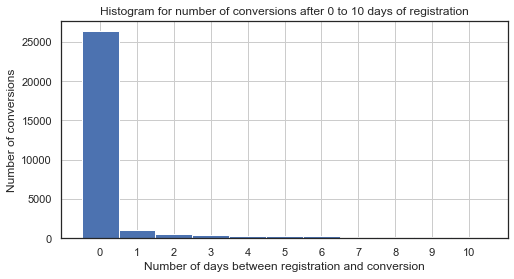

In [303]:
# Create Histogram showing every number of conversions for different conversion days between 0 and 10

conversion_table['conversion_days'].hist(bins=11, range=(-0.5, 10.5), figsize=(8, 4))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title("Histogram for number of conversions after 0 to 10 days of registration")
plt.xlabel("Number of days between registration and conversion")
plt.ylabel("Number of conversions")
plt.show()

In [304]:
# print the values shown in the histogram
conversion_table[conversion_table['conversion_days'] <= 10]['conversion_days'].value_counts().sort_index()

0     26363
1      1011
2       563
3       434
4       324
5       270
6       260
7       218
8       189
9       140
10      140
Name: conversion_days, dtype: int64

One can see a massive decreasing trend from conversion day 0 to 1 and a continuing decreasing trend for days 1 until 10. In the histogram one can observe that the large part of all conversions in the first 10 days happenend on the same day the registration happened (26,363 conversions). One day after registration (conversion day 1) we only had 1011 conversions; this value is roughly 26 times smaller than the one for day 0. Overall the distribution in the histogram is negative exponentially.

In [305]:
# create pivot table showing the number of converted user after certain days; first login months as cohorts 
# Every user is only once in 'conversion_table', so every user counts one in only one certain cell in the pivot table

conversion_pivot = conversion_table \
        .pivot_table(
                index='First login month', \
                columns='conversion_days', \
                values='user_id', \
                aggfunc='nunique')

In [306]:
# Our pivot table contains several conversion days, so there are missing values that can be filled with 0 as aggfunc is nunique
conversion_pivot = conversion_pivot.fillna(0)

# add column 'conversion_0-6sum' summing up the number of converted user within the first 7 days
for date in conversion_pivot.index:
    conversion_0_to_6_sum = 0
    for i in range(7):
        conversion_0_to_6_sum += conversion_pivot.loc[date, i]
    conversion_pivot.loc[date, 'conversion_0-6sum'] = conversion_0_to_6_sum.round(0)

# column 'conversion_0-6sum' as integers
conversion_pivot['conversion_0-6sum'] = conversion_pivot['conversion_0-6sum'].astype(int)
        
# quote of converted user within 24 hours and converted user within the first week
conversion_pivot['percentage_of_0_in_0-6sum'] = \
        (conversion_pivot[0] / conversion_pivot['conversion_0-6sum'] * 100).round(1)

# sum up all converted user within the cohorts as column 'conversion_all_sum'
for date in conversion_pivot.index:
    conversion_all_sum = 0
    for i in conversion_table['conversion_days'].unique():
        conversion_all_sum += conversion_pivot.loc[date, i]
    conversion_pivot.loc[date, 'conversion_all_sum'] = conversion_all_sum.round(0)

# column as integer
conversion_pivot['conversion_all_sum'] = conversion_pivot['conversion_all_sum'].astype(int)    

# quote of converted user within 24 hours and all converted user within a cohort
conversion_pivot['percentage_of_0_in_all_sum'] = \
        (conversion_pivot[0] / conversion_pivot['conversion_all_sum'] * 100).round(1)

In [307]:
# show only the first seven conversion days values
for i in conversion_table['conversion_days'].unique():
    if i not in [0, 1, 2, 3, 4, 5, 6]:
        conversion_pivot = conversion_pivot.drop(columns=[i])
    else:
        conversion_pivot[i] = conversion_pivot[i].astype(int)

In [308]:
conversion_pivot

conversion_days,0,1,2,3,4,5,6,conversion_0-6sum,percentage_of_0_in_0-6sum,conversion_all_sum,percentage_of_0_in_all_sum
First login month,,,,,,,,,,,
2017-06,1804,55,27,34,21,15,16,1972,91.5,2923,61.7
2017-07,1526,59,37,19,20,17,13,1691,90.2,2458,62.1
2017-08,1097,27,14,12,16,9,12,1187,92.4,1721,63.7
2017-09,1966,71,39,40,30,24,35,2205,89.2,3058,64.3
2017-10,3302,118,70,58,31,37,32,3648,90.5,4678,70.6
2017-11,2866,145,73,65,42,33,33,3257,88.0,4262,67.2
2017-12,2992,125,68,61,41,37,26,3350,89.3,4074,73.4
2018-01,2326,94,53,38,29,29,25,2594,89.7,3119,74.6
2018-02,2482,95,74,40,40,25,18,2774,89.5,3186,77.9


#### Conclusion

As one can see in the Histogram or the pivot table, the large part of the users do their first order at the same day they registered. Compared to all conversions within the first week (day 0 to 6), the same day as registration constitutes around 90% of all conversions for all cohorts. The column 'percentage_of_0_in_all_sum' describes the quote of the number of those users who converted the same day they registered and the number of all converted users for every cohort, given in percent. When looking at that column one can observe an increasing trend for recent cohorts; the highest value of 89.6% has the most recent cohort from may 2018. It may be that the website has developed positively to encourage recently registered users to make an order.

<a id="4.2"></a>

### 4.2) Number of orders

How many orders do customers make during monthly time periods?

In [309]:
orders.head()

,order_date,revenue,user_id,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [310]:
# add first logins to orders table and name it 'orders_cohort'
orders_cohorts = orders.merge(first_login_date_by_customers, on='user_id')

# extract first login months from first login date
orders_cohorts['first_login_month'] = orders_cohorts['first_login_date'].astype('datetime64[M]')

# extract the month of the order from order date
orders_cohorts['order_month'] = orders_cohorts['order_date'].astype('datetime64[M]')

orders_cohorts.head()

,order_date,revenue,user_id,order_month,first_login_date,first_login_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:09:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:14:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:25:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:14:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:31:00,2017-06-01


In [311]:
orders_grouped_by_cohorts = orders_cohorts.groupby(['first_login_month', 'order_month']) \
        .agg({'revenue': 'count', 'user_id': 'nunique'}).reset_index()

orders_grouped_by_cohorts.columns = ['first_login_month', 'order_month', 'n_purchases', 'n_customers']

orders_grouped_by_cohorts['First login month'] = orders_grouped_by_cohorts['first_login_month'].dt.strftime('%Y-%m')

orders_grouped_by_cohorts['purchases_per_customer'] = \
        orders_grouped_by_cohorts['n_purchases'] / orders_grouped_by_cohorts['n_customers']

# Calculate Lifetimes given in months units; we substract order month from first login month
orders_grouped_by_cohorts['Lifetime month'] = \
        (orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_login_month']) / np.timedelta64(1, 'M')

# Round month values to whole months
orders_grouped_by_cohorts['Lifetime month'] = orders_grouped_by_cohorts['Lifetime month'].round().astype('int')

orders_grouped_by_cohorts.head()

,first_login_month,order_month,n_purchases,n_customers,First login month,purchases_per_customer,Lifetime month
0,2017-06-01,2017-06-01,2354,2023,2017-06,1.163618,0
1,2017-06-01,2017-07-01,387,231,2017-06,1.675325,1
2,2017-06-01,2017-08-01,273,129,2017-06,2.116279,2
3,2017-06-01,2017-09-01,442,188,2017-06,2.351064,3
4,2017-06-01,2017-10-01,516,257,2017-06,2.007782,4


In [312]:
# We have over 50,000 orders
len(orders_cohorts)

50415

In [313]:
# We have only one order in the cohort '2018-06-01' out from over 50,000 orders; that's too less for significant 
#observations and will be neglected
orders_cohorts[orders_cohorts['order_month'] == '2018-06-01']

,order_date,revenue,user_id,order_month,first_login_date,first_login_month
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01,2018-05-31 23:59:00,2018-05-01


In [314]:
# create pivot table with first login months as cohorts and lifetime months with number of orders
orders_pivot = orders_grouped_by_cohorts[orders_grouped_by_cohorts['order_month'] < '2018-06-01'] \
        .pivot_table(
                index='First login month',
                columns='Lifetime month',
                values='n_purchases',
                aggfunc='mean')

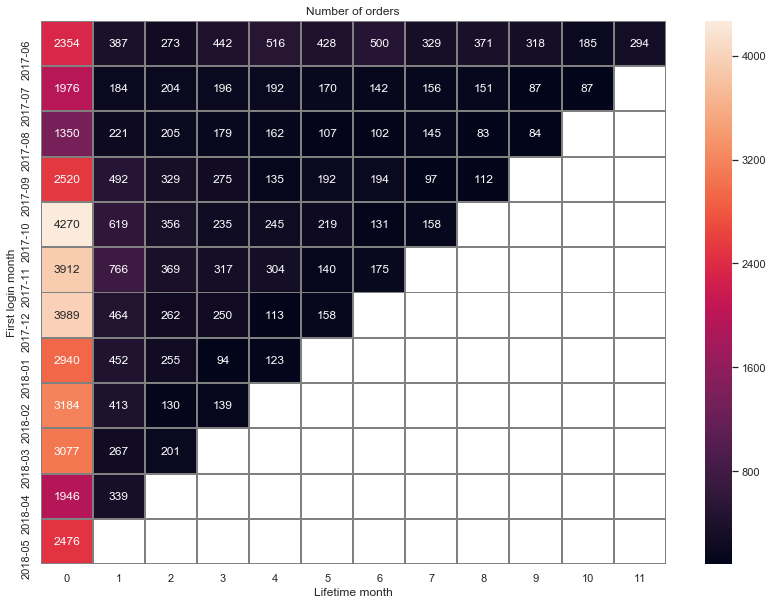

In [315]:
# Plot figure with colors
sns.set(style='white')
plt.figure(figsize=(14, 10))
plt.title('Number of orders')
sns.heatmap(orders_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray') 

#### Conclusion

In the plot for number of orders one can see clearly that for every cohort the 0th lifetime has significantly the most orders compared to the upcoming lifetimes. From the first lifetime on there's a decreasing trend of number of orders for upcoming lifetimes -besides the cohort june 2017. This cohort is the only one that has an increasing trend from august 2017 until december 2017. This kind of increasing number of purchases after the 0th lifetime can't be observed for other cohorts. The cohorts october, november and december have significantly the most orders in the 0th lifetime month compared to other cohorts.

<a id="4.3"></a>

### 4.3) Number of purchases per customer

In [316]:
# total average number of purchases per customer
orders.groupby('user_id').agg({'revenue': 'count'}).mean()

revenue    1.380363
dtype: float64

In [317]:
# create pivot table with first login months as cohorts and lifetime months with number of orders
orders_per_customer_pivot = orders_grouped_by_cohorts[orders_grouped_by_cohorts['order_month'] < '2018-06-01'] \
        .pivot_table(
                index='First login month',
                columns='Lifetime month',
                values='purchases_per_customer',
                aggfunc='mean')

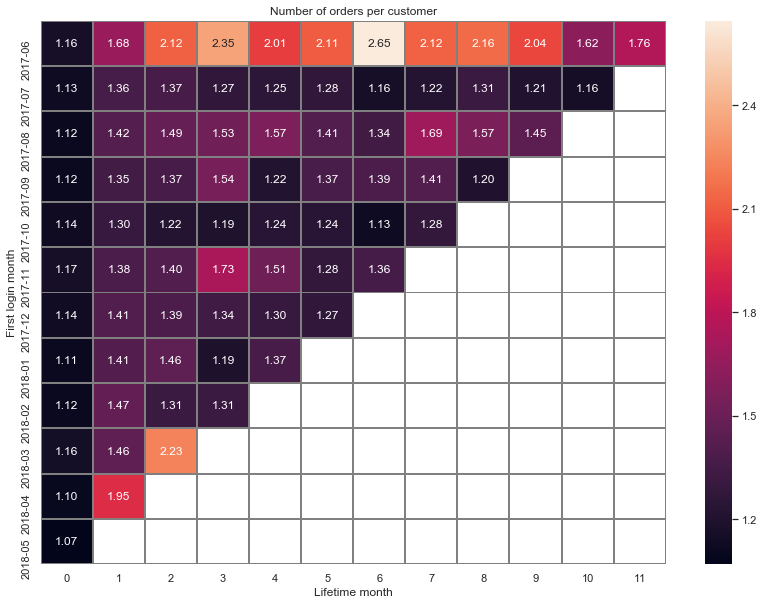

In [318]:
# Plot figure with colors
sns.set(style='white')
plt.figure(figsize=(14, 10))
plt.title('Number of orders per customer')
sns.heatmap(orders_per_customer_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 

#### Conclusion

Here we have the number of orders divided by the number of buyers for every lifetime month and cohort. The lowest values for number of orders per customer are given for lifetime month 0 varying between 1.10 and 1.17. Starting with the first month, the values vary irregularly. The highest value for the first lifetime month is given for the apri 2018 cohort while for all following lifetime month, the highest values are reached by the june 2017 cohort. This cohort differs significantly from the other cohorts. For that cohort we have values bigger than 2 between the second and the 9th lifetime month. Comparing to the heatmap 'Number of orders' we see that the june 2017 cohort had above-average many orders between the 3rd and the 9th lifetime month.

Overall, for all orders the average number of purchases per customer is 1.38. This value is significantly higher than all values in lifetime month 0. As the heatmap 'Number of orders' shows significant high number of orders for lifetime month 0 we could assume that there are many customers making an order the same month they registered but not making orders for the following months. 

<a id="4.4"></a>

### 4.4) Average purchase size

In [319]:
# Notice the big difference between mean and median and the big standard deviation for revenues
orders_cohorts['revenue'].describe().apply("{:.2f}".format)

count    50415.00
mean         5.00
std         21.82
min          0.00
25%          1.22
50%          2.50
75%          4.89
max       2633.28
Name: revenue, dtype: object

In [320]:
# There are only few revenues that are 0 dollars; that might be because of special offers and/or coupons
len(orders_cohorts[orders_cohorts['revenue'] == 0])

51

In [321]:
revenues_grouped_by_cohorts = orders_cohorts.groupby(['first_login_month', 'order_month']) \
        .agg({'revenue': 'sum', 'user_id': 'count'}).reset_index()

revenues_grouped_by_cohorts.columns = ['first_login_month', 'order_month', 'revenue_sum', 'n_purchases']

revenues_grouped_by_cohorts['avg_purchase_size'] = \
        revenues_grouped_by_cohorts['revenue_sum'] / revenues_grouped_by_cohorts['n_purchases']

revenues_grouped_by_cohorts['First login month'] = revenues_grouped_by_cohorts['first_login_month'].dt.strftime('%Y-%m')

# Calculate Lifetimes given in months units; we substract order month from first login month
revenues_grouped_by_cohorts['Lifetime month'] = \
        (revenues_grouped_by_cohorts['order_month'] - revenues_grouped_by_cohorts['first_login_month']) / np.timedelta64(1, 'M')

# Round month values to whole months
revenues_grouped_by_cohorts['Lifetime month'] = revenues_grouped_by_cohorts['Lifetime month'].round().astype('int')

revenues_grouped_by_cohorts.head()

,first_login_month,order_month,revenue_sum,n_purchases,avg_purchase_size,First login month,Lifetime month
0,2017-06-01,2017-06-01,9557.49,2354,4.060106,2017-06,0
1,2017-06-01,2017-07-01,2664.58,387,6.885220,2017-06,1
2,2017-06-01,2017-08-01,1464.69,273,5.365165,2017-06,2
3,2017-06-01,2017-09-01,3882.09,442,8.783009,2017-06,3
4,2017-06-01,2017-10-01,3940.59,516,7.636802,2017-06,4


In [322]:
# create pivot table to get average purchase size for every cohort and lifetime
revenues_pivot = revenues_grouped_by_cohorts[revenues_grouped_by_cohorts['order_month'] <= '2018-05-01'] \
        .pivot_table(
                index='First login month',
                columns='Lifetime month',
                values='avg_purchase_size',
                aggfunc='mean')

In [323]:
# average purchase size for the all period of time
revenues_grouped_by_cohorts['revenue_sum'].sum() / revenues_grouped_by_cohorts['n_purchases'].sum()

4.999646930477034

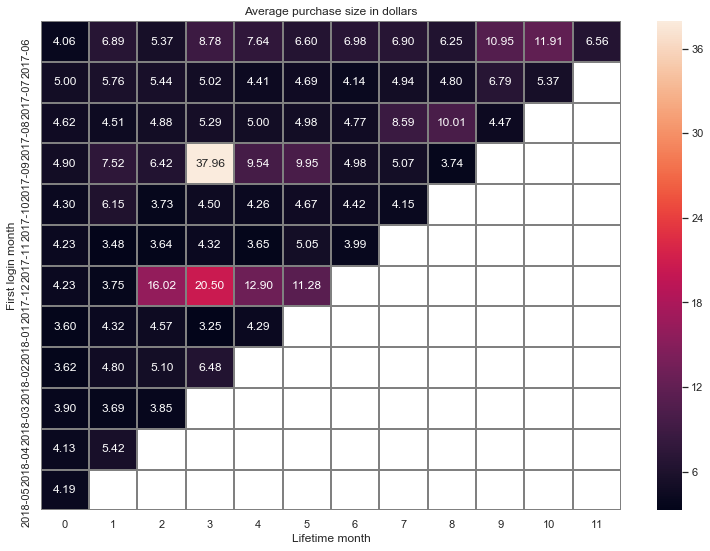

In [324]:
# plot pivot table with colors
plt.figure(figsize=(13, 9))
plt.title('Average purchase size in dollars')
sns.heatmap(
    revenues_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey')
plt.show()

In [325]:
# Show most expensive orders
most_expensive_orders = orders_cohorts.sort_values(by='revenue', ascending=False) \
        [['first_login_month', 'order_month', 'revenue']] \
        .reset_index(drop=True)

# increase index by one to have the ranking in the index
most_expensive_orders.index = range(1,len(most_expensive_orders)+1)

most_expensive_orders.head()

,first_login_month,order_month,revenue
1,2017-09-01,2017-12-01,2633.28
2,2017-12-01,2018-02-01,1236.28
3,2017-12-01,2018-02-01,1221.37
4,2017-09-01,2017-12-01,1195.64
5,2017-12-01,2017-12-01,1109.10


#### Conclusion

The average purchase size has some outliers that are not due to a certain trend observed in the plot. Indeed there can't be any trend or regularity observed in this plot. This means that the outliers in the plot are due to above-average expensive orders as one can see in the table above. For example, the significantly most expensive order (2633 dollars) is from the september cohort and was made in december. This corresponds to the highest value in the average purchase size plot.
Overall, the average purchase size for all orders is 5 dollars.

<a id="4.5"></a>

### 4.5) Average purchase size - Dynamics

In [326]:
# group the sum of revenues and the number of purchases by the month of order
revenues_grouped_by_months = orders_cohorts.groupby(['order_month']).agg({'revenue': 'sum', 'user_id': 'count'}).reset_index()
# rename columns
revenues_grouped_by_months.columns = ['order_month', 'revenue_sum', 'n_purchases']
# calculate average purchase size for every month
revenues_grouped_by_months['monthly_average_purchas_size'] = \
        revenues_grouped_by_months['revenue_sum'] / revenues_grouped_by_months['n_purchases']

revenues_grouped_by_months

,order_month,revenue_sum,n_purchases,monthly_average_purchas_size
0,2017-06-01,9557.49,2354,4.060106
1,2017-07-01,12539.47,2363,5.306589
2,2017-08-01,8758.78,1807,4.847139
3,2017-09-01,18345.51,3387,5.416448
4,2017-10-01,27987.70,5679,4.928280
5,2017-11-01,27069.93,5659,4.783518
6,2017-12-01,36388.60,6218,5.852139
7,2018-01-01,19417.13,4721,4.112927
8,2018-02-01,25560.54,5281,4.840095
9,2018-03-01,28834.59,5326,5.413930


In [327]:
# june 2018 has only one order, so we delete this row
revenues_grouped_by_months = revenues_grouped_by_months[revenues_grouped_by_months['order_month'] <= '2018-05-01']

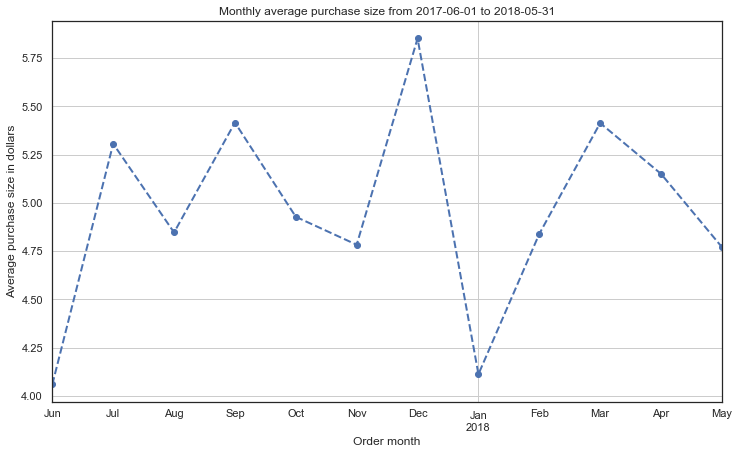

In [328]:
# Plot diagram with average puchase sizes for every month

revenues_grouped_by_months.plot(x='order_month', y='monthly_average_purchas_size', grid=True, figsize=(12, 7), legend=None, \
                                linewidth=2, linestyle='dashed', marker='o')
plt.title("Monthly average purchase size from 2017-06-01 to 2018-05-31")
plt.xlabel("Order month")
plt.ylabel("Average purchase size in dollars")
plt.show()

#### Conclusion

Over the year from 2017-06-01 to 2018-05-31, the monthly average purchase size varies from 4.06 in june 2017 and 5.85 dollars in december 2017. Having a strong increase from june to july, the values only vary a bit around 5 dollars until another strong increase in december. After that we have a heavy decrease to the second lowest value in the graph in january 2018 followed by an increase to average values again around 5 dollars. One reason explaining the heavy increase in december 2017 could be the shopping of christmas presents that have above-average prices. As we already observed in the cohorts heatmap for average purchase sizes, there are outliers because of single orders that are extremly high priced. Looking at the five most expensive orders explains better the graph: Three of the five most expensive orders have been made in december. 

<a id="4.6"></a>

### 4.6) Lifetime Values (LTV)

How much money do the customers bring?

In [329]:
# extract order month out from order date
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

# create an extra table with the first order months
first_orders = orders.groupby('user_id').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_month']

# create cohort sizes by the number of buyers for every month of first order
ltv_cohort_sizes = first_orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
ltv_cohort_sizes.columns = ['first_order_month', 'n_buyers']

# merge orders table with first login dates
df_ltv = pd.merge(orders, first_orders, on='user_id')

df_ltv.head()

,order_date,revenue,user_id,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [330]:
# group by order month and month of first order and sum up all corresponding revenues
ltv_cohorts = df_ltv.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
# rename columns
ltv_cohorts.columns = ['first_order_month','order_month', 'revenue_sum']
# add number of buyers for every cohort to create the cohort report
ltv_cohorts_report = pd.merge(ltv_cohort_sizes, ltv_cohorts, on='first_order_month')

ltv_cohorts_report.head()

,first_order_month,n_buyers,order_month,revenue_sum
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [331]:
# exclude the row with only one buyer
ltv_cohorts_report = ltv_cohorts_report[ltv_cohorts_report['first_order_month'] <= '2018-05-01']

# The age of the cohorts is given in months, so we substract the days between first order and order months,
# transform these days to months round the values and transform them to integers
ltv_cohorts_report['Age in months'] = ltv_cohorts_report['order_month'] - ltv_cohorts_report['first_order_month']
ltv_cohorts_report['Age in months'] = ltv_cohorts_report['Age in months'] / np.timedelta64(1, 'M')
ltv_cohorts_report['Age in months'] = ltv_cohorts_report['Age in months'].round().astype('int')

# caluclate lifetime values
ltv_cohorts_report['LTV'] = ltv_cohorts_report['revenue_sum'] / ltv_cohorts_report['n_buyers']

# for having a string format of first month of login
ltv_cohorts_report['First order month'] = ltv_cohorts_report['first_order_month'].dt.strftime('%Y-%m')

ltv_cohorts_report.head()

,first_order_month,n_buyers,order_month,revenue_sum,Age in months,LTV,First order month
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06


In [332]:
print("Total sum of all revenues: {:.0f} dollars".format(orders['revenue'].sum()))

Total sum of all revenues: 252057 dollars


In [333]:
# create pivot table with the average lifetime values (LTV) in dollars
mean_ltv_cumsum_pivot = ltv_cohorts_report \
        .pivot_table( \
                index='First order month', \
                columns='Age in months', \
                values='LTV', \
                aggfunc='mean').cumsum(axis=1)

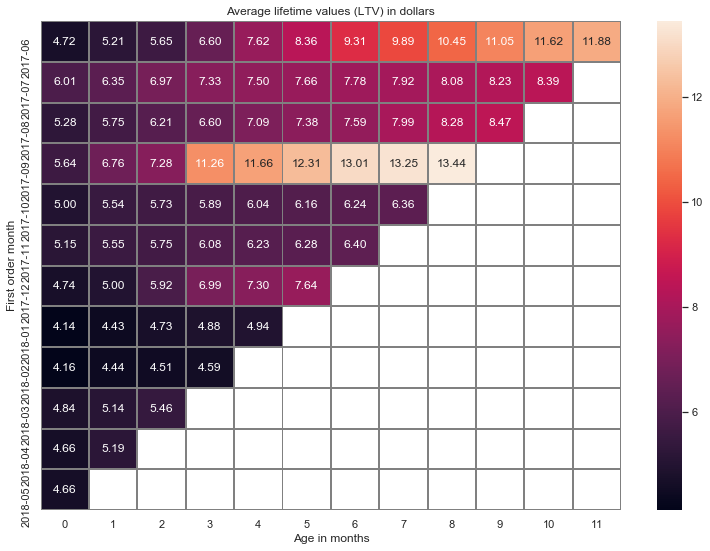

In [334]:
# plot pivot table with colors
plt.figure(figsize=(13, 9))
plt.title('Average lifetime values (LTV) in dollars')
sns.heatmap(
    mean_ltv_cumsum_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey')
plt.show()

In [335]:
print("Average LTV for 6 months: {:.2f} dollars".format(mean_ltv_cumsum_pivot.mean(axis=0)[5]))

Average LTV for 6 months: 7.97 dollars


#### Conclusion

The cumulative revenue per customer has outstanding values for three cohorts: <br>
The june 2017 cohort has a steady and constant increase to the second highest cumulated sum: 11.88 dollars. One can recognize the outlier at december in the september cohort; there are very expensive orders, so there's a jump for the average LTV from 7.28 dollars in november to 10.26 dollars in december. Also the december cohort has some expensive orders, so there is a LTV of 7.64 dollars in the 5th lifetime month.  As the number of purchases was significantly high for the 0th lifetime so all average LTVs start with more than 4 dollars in all cohorts.
<br> <br>
The average LTV for 6 months is given with nearly 8 dollars.
<br> <br>
The total sum of all revenues is 252,057 dollars.

<a id="5"></a>

## 5) Reports and Metrics: Marketing

<a id="5.1"></a>

### 5.1) Money spent overall/ over time/ per source

In [336]:
# add column with month of ad
costs['month'] = costs['ad_date'].astype('datetime64[M]')

costs.head()

,ad_source_id,ad_date,ad_costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [337]:
len(costs)

2542

In [338]:
# for every month we sum up all ad costs
costs_per_month = costs.groupby('month').agg({'ad_costs': 'sum'}).reset_index()

# rename columns
costs_per_month.columns = ['month', 'sum_ad_costs']

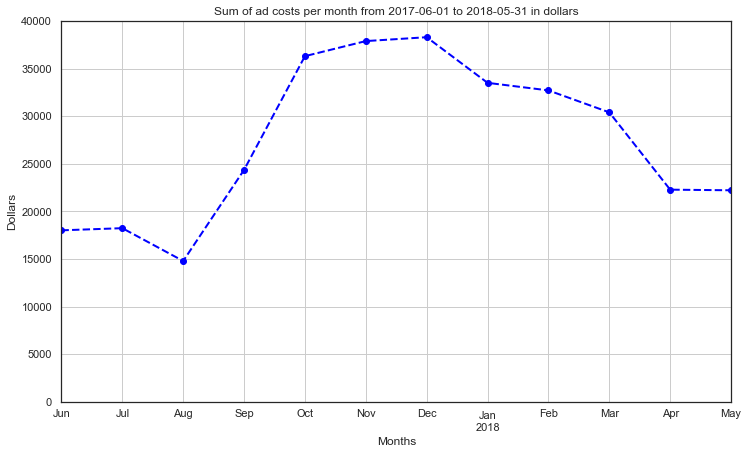

In [339]:
# PLot Graph for summed up ad costs for every month

costs_per_month.plot(x='month', y='sum_ad_costs', \
        figsize = (12, 7), legend=None, linewidth=2, linestyle='dashed', marker='o', color='blue')
plt.title("Sum of ad costs per month from 2017-06-01 to 2018-05-31 in dollars")
plt.xlabel("Months")
plt.ylabel("Dollars")
plt.ylim([0, 40000])
plt.grid(True, which="both")
plt.show()

The graph shows that the money spent for ads is not constant month for month. In june we start with around 18,000 dollars and we have a strong increasing trend from august to december where we reach the month with the highest ad expenses (around 38,000 dollars). This was also the time period where we had increasing number of orders for the june 2017 cohort. After that, we have a decreasing trend until the end of the observed time period.

In [340]:
costs_per_month

,month,sum_ad_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [341]:
# for every month and every source ID we sum up all ad costs
costs_per_month_and_source = costs.groupby(['month', 'ad_source_id']).agg({'ad_costs': 'sum'}).reset_index()

# rename columns
costs_per_month_and_source.columns = ['month', 'source_id', 'costs']

costs_per_month_and_source.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


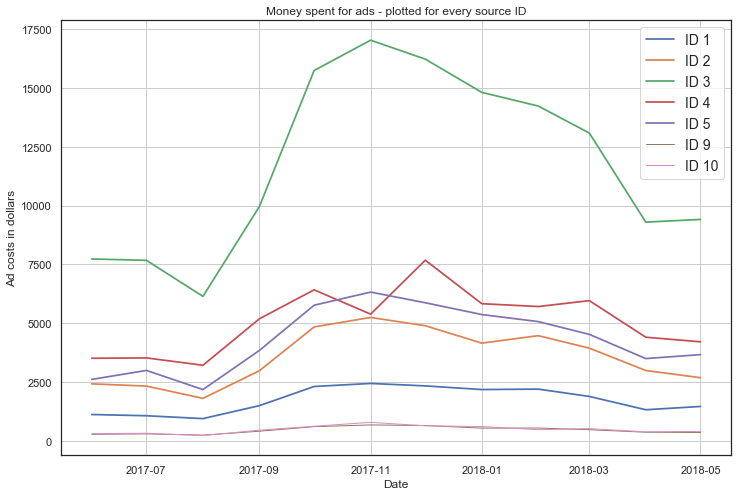

In [342]:
# Plot a diagramm showing the expenses by source for every month

xaxis   = costs_per_month_and_source['month'].unique()
data_1  = costs_per_month_and_source[costs_per_month_and_source['source_id'] == 1]['costs']
data_2  = costs_per_month_and_source[costs_per_month_and_source['source_id'] == 2]['costs']
data_3  = costs_per_month_and_source[costs_per_month_and_source['source_id'] == 3]['costs']
data_4  = costs_per_month_and_source[costs_per_month_and_source['source_id'] == 4]['costs']
data_5  = costs_per_month_and_source[costs_per_month_and_source['source_id'] == 5]['costs']
data_9  = costs_per_month_and_source[costs_per_month_and_source['source_id'] == 9]['costs']
data_10 = costs_per_month_and_source[costs_per_month_and_source['source_id'] == 10]['costs']

plt.figure(figsize=(12, 8))
plt.plot(xaxis, data_1, label='ID 1', linewidth=1.75)
plt.plot(xaxis, data_2, label='ID 2', linewidth=1.75)
plt.plot(xaxis, data_3, label='ID 3', linewidth=1.75)
plt.plot(xaxis, data_4, label='ID 4', linewidth=1.75)
plt.plot(xaxis, data_5, label='ID 5', linewidth=1.75)
plt.plot(xaxis, data_9, label='ID 9', linewidth=1)
plt.plot(xaxis, data_10, label='ID 10', linewidth=1)
plt.xlabel("Date")
plt.ylabel("Ad costs in dollars")
plt.title("Money spent for ads - plotted for every source ID")
plt.grid()
plt.legend(prop={'size': 14})
plt.show()

The increasing and decreasing trends for the ad money spent for every source ID coinsides with the overall monthly money spent for ads. One can see clearly that source ID 3 has significantly the biggest ad expenses.

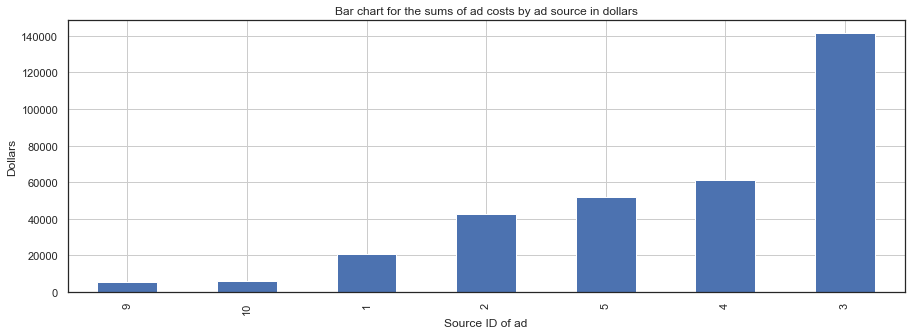

In [343]:
# Money spent for each ad source in a bar chart

costs.groupby('ad_source_id').agg({'ad_costs': 'sum'})['ad_costs'].sort_values() \
        .plot(kind='bar', grid = True, figsize = (15, 5))
plt.ylabel('Dollars')
plt.xlabel('Source ID of ad')
plt.title('Bar chart for the sums of ad costs by ad source in dollars')
plt.show()

In the bar chart it's possible to differentiate four groups for total ad expenses: <br>
The IDs 9 and 10 have a sum that is smaller than 10,000 dollars, ID 1 is around 20,000 dollars, the IDs 2, 4, and 5 are in the range of 40,000 and 60,000 dollars. The absolutely most money was spent for the ad with the ID 3 with around 140,000 dollars.

In [344]:
# print corresonding table

costs.groupby('ad_source_id').agg({'ad_costs': 'sum'})['ad_costs'].sort_values()

ad_source_id
9       5517.49
10      5822.49
1      20833.27
2      42806.04
5      51757.10
4      61073.60
3     141321.63
Name: ad_costs, dtype: float64

In [345]:
print("Total sum of ad costs: {:.0f} dollars".format(costs_per_month['sum_ad_costs'].sum()))

Total sum of ad costs: 329132 dollars


#### Conclusion

The total sum of all ad costs is 329,132 dollars, <br>
the total sum of all revenues is 252,057 dollars. <br> <br>
We can make an important conclusion about the operating profit for the company in the observed year: <br>
The operating profit is negative even without considering taxes, loans and prime costs. <br>
We don't know exactly about the prime costs, so we can set an average margin rate of 50%. <br>
The rising monthly amounts of ad costs between august and december did only affect the june cohort since we observed slightly higher number of purchases and LTV in that time period compared to other cohorts. <br>
In the bar chart we can clearly see that the costs per ad source differ strongly: The lowest expenses are for ad source ID 9 with 5517 dollars and the highest are for ad source ID 3 with slightly more than 141,321 dollars. <br> <br>
We also observed that the monthly spent money for ads coinsides with the monthly spent money for every source ID.

<a id="5.2"></a>

### 5.2) Customer acquisition costs (CAC)

<a id="5.2.1"></a>

#### 5.2.1) CAC by ad source

In [346]:
# Notice that you have (nearly) the same number of ad costs for the ad source IDs 1, 2, 3, 4, 5, 9, 10 - not for 6 or 7
costs['ad_source_id'].value_counts()

5     364
10    363
9     363
4     363
3     363
2     363
1     363
Name: ad_source_id, dtype: int64

In [347]:
# transform source ids to integers for being able to apply mean function on it
visits_cleaned_ids['ad_source_id'] = visits_cleaned_ids['ad_source_id'].astype('int')

# create an extra table with the source IDs for every user
# the mean function extracts the ID since in the reworked table 'visits_cleaned_ids' every user only has one source ID
id_for_user = visits_cleaned_ids.groupby('user_id').agg({'ad_source_id': 'mean'}).reset_index()

id_for_user['ad_source_id'].value_counts()

4     72346
3     66116
5     49237
2     17616
1      9469
10     6903
9      6448
7        32
6         2
Name: ad_source_id, dtype: int64

In [348]:
# there are no expenses for source IDs 6 or 7, so delete them from the table
id_for_user = id_for_user[(id_for_user['ad_source_id'] != 6)&(id_for_user['ad_source_id'] != 7)]
id_for_user.head()

,user_id,ad_source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [349]:
# extract order month out from order date
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

# merge orders table with source IDs
df_cac = pd.merge(orders, id_for_user, on='user_id')

df_cac.sort_values(by='order_date', ascending=False).head()

,order_date,revenue,user_id,order_month,ad_source_id
50413,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01,4
50412,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3
50411,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3
50410,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10
50409,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4


In [350]:
# delete that one order on june 2018
df_cac = df_cac[df_cac['order_month'] <= '2018-05-01']

In [351]:
# create cohort sizes by the number of buyers for every source ID
cac_cohort_sizes = df_cac.groupby('ad_source_id').agg({'user_id': 'nunique'}).reset_index()
cac_cohort_sizes.columns = ['source_id', 'n_buyers']

cac_cohort_sizes

,source_id,n_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10295
4,5,6931
5,9,1088
6,10,1329


In [352]:
# group by order source ID and month and sum up all corresponding revenues
source_cohorts = df_cac.groupby(['ad_source_id','order_month']).agg({'revenue': 'sum'}).reset_index()

# rename columns
source_cohorts.columns = ['source_id','order_month', 'revenue_sum']

# add number of buyers for every cohort to create the cohort report
source_cohorts_report = pd.merge(cac_cohort_sizes, source_cohorts, on='source_id')

# We create a table with the costs per source
costs_per_source = costs.groupby('ad_source_id').agg({'ad_costs': 'sum'}).reset_index()
costs_per_source.columns= ['source_id', 'ad_costs']

# merge that table with our report table
source_cohorts_report = pd.merge(source_cohorts_report, costs_per_source, on='source_id')

# calculate LTV
source_cohorts_report['LTV'] = source_cohorts_report['revenue_sum'] / source_cohorts_report['n_buyers']

# calculate CAC
source_cohorts_report['CAC'] = source_cohorts_report['ad_costs'] / source_cohorts_report['n_buyers']

# add order month as string
source_cohorts_report['Order month'] = source_cohorts_report['order_month'].dt.strftime('%Y-%m')

source_cohorts_report.head()

,source_id,n_buyers,order_month,revenue_sum,ad_costs,LTV,CAC,Order month
0,1,2899,2017-06-01,1378.70,20833.27,0.475578,7.186364,2017-06
1,1,2899,2017-07-01,1581.68,20833.27,0.545595,7.186364,2017-07
2,1,2899,2017-08-01,1441.49,20833.27,0.497237,7.186364,2017-08
3,1,2899,2017-09-01,3071.61,20833.27,1.059541,7.186364,2017-09
4,1,2899,2017-10-01,3621.82,20833.27,1.249334,7.186364,2017-10


In [353]:
# For every source cohort the CAC value is the same, so I choose the first order month to show every CAC value only one time
cac_values_table = source_cohorts_report[source_cohorts_report['order_month'] == '2017-06-01'][['source_id', 'CAC']]
# set the sources as index
cac_values_table.index = cac_values_table['source_id']
# the column is not needed any more since the index is the same
cac_values_table = cac_values_table.drop(columns=['source_id'])

cac_values_table

,CAC
source_id,
1,7.186364
2,12.209367
3,13.493901
4,5.932356
5,7.467479
9,5.071222
10,4.381106


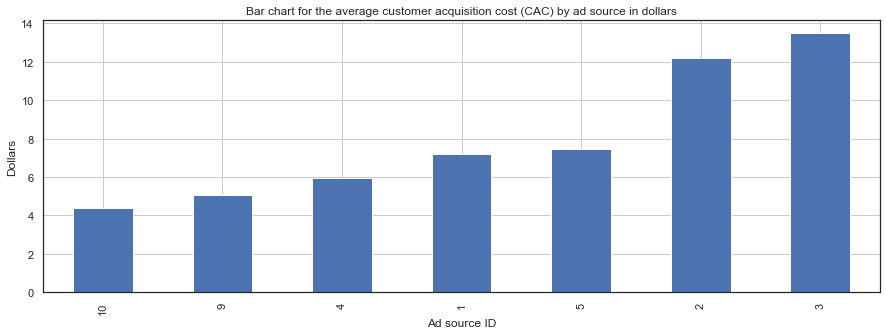

In [354]:
# PLot bar chart with the average CAC value for every source ID

cac_values_table['CAC'].sort_values().plot(kind='bar', grid = True, figsize = (15, 5))
plt.ylabel('Dollars')
plt.xlabel('Ad source ID')
plt.title('Bar chart for the average customer acquisition cost (CAC) by ad source in dollars')
plt.show()

##### Conclusion

Source 3 was the one with the significantly highest total expenses and is also the one with the highest average customer acquisition cost (13.49 dollars). The lowest costs per customer acquisition have sources 9 and 10 (10: 4.38 dollars, 9: 5.07 dollars); these two are those with the lowest total expenses, so one can clearly see potential for marketing improvement.

<a id="5.2.2"></a>

#### 5.2.2) CAC over time

In [355]:
# estimate the month of first order for every customer
first_buy_month_by_user = orders.groupby('user_id').agg({'order_month': 'min'}).reset_index()

# calculate the number of new buyers every month by grouping the table by order months
nunique_buyers_per_month = first_buy_month_by_user.groupby('order_month').agg({'user_id': 'nunique'}).reset_index()

# rename columns
nunique_buyers_per_month.columns = ['month', 'n_new_buyers']

nunique_buyers_per_month

,month,n_new_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [356]:
# sum up the ad costs for every month and safe it as 'monthly_costs'
monthly_costs = costs.groupby('month').agg({'ad_costs': 'sum'})

# merge the table with the monthly new buyers with the monthly ad costs
cac_by_month = pd.merge(nunique_buyers_per_month, monthly_costs, on='month', how='left')

# calculate CAC
cac_by_month['CAC'] = cac_by_month['ad_costs'] / cac_by_month['n_new_buyers']

cac_by_month

,month,n_new_buyers,ad_costs,CAC
0,2017-06-01,2023,18015.00,8.905091
1,2017-07-01,1923,18240.59,9.485486
2,2017-08-01,1370,14790.54,10.796015
3,2017-09-01,2581,24368.91,9.441654
4,2017-10-01,4340,36322.88,8.369327
5,2017-11-01,4081,37907.88,9.288870
6,2017-12-01,4383,38315.35,8.741809
7,2018-01-01,3373,33518.52,9.937302
8,2018-02-01,3651,32723.03,8.962758
9,2018-03-01,3533,30415.27,8.608907


In [357]:
# average CAC for the whole year
cac_by_month['ad_costs'].sum() / cac_by_month['n_new_buyers'].sum()

9.011626098622784

In [358]:
# both methods give the same average CAC, so my calculations are confirmed
costs['ad_costs'].sum() / orders['user_id'].nunique()

9.011626098622786

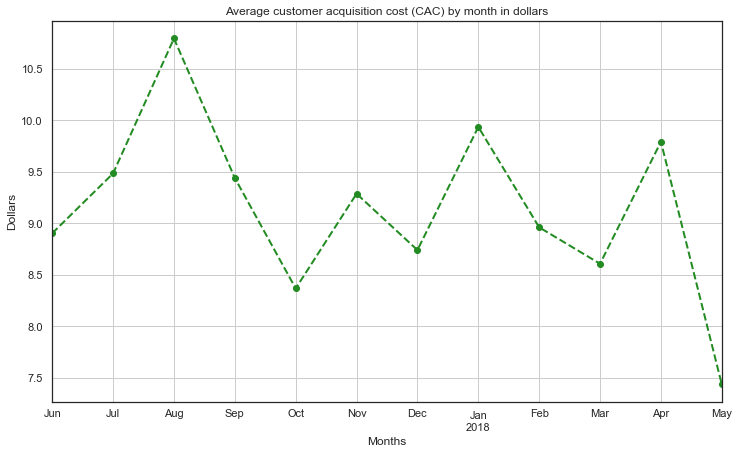

In [359]:
cac_by_month[cac_by_month['month'] <= '2018-05-01'].plot(x='month', y='CAC', \
        figsize = (12, 7), legend=None, linewidth=2, linestyle='dashed', marker='o', color='forestgreen')
plt.title("Average customer acquisition cost (CAC) by month in dollars")
plt.xlabel("Months")
plt.ylabel("Dollars")
plt.grid(True, which="both")
plt.show()

##### Conclusion

The graph shows the average CAC for every month in the observed time period. In average we have a CAC of 9.01 dollars over the whole year. Besides the strong decrease from april to may 2018 the graph is oscillating around the average CAC from month to month. The highest value is reached in august 2017 with slightly over 10.50 dollars and the lowest value is reached in may 2018 with less than 7.50 dollars.

<a id="5.3"></a>

### 5.3) Return of marketing investments (ROI)

<a id="5.3.1"></a>

#### 5.3.1) ROI by month of first login

In [360]:
costs.head()

,ad_source_id,ad_date,ad_costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [361]:
# Sum up the ad costs for every month
monthly_costs = costs.groupby('month').agg({'ad_costs': 'sum'})

# merge the table 'ltv_cohorts_report' from the section 'LTV' with the monthly ad costs.
ltv_cohorts_report = pd.merge(ltv_cohorts_report, monthly_costs, left_on='first_order_month', right_on='month')

# Calculate CAC
ltv_cohorts_report['CAC'] = ltv_cohorts_report['ad_costs'] / ltv_cohorts_report['n_buyers']

# Calculate ROI
ltv_cohorts_report['ROI'] = ltv_cohorts_report['LTV'] / ltv_cohorts_report['CAC']

ltv_cohorts_report.head()

,first_order_month,n_buyers,order_month,revenue_sum,Age in months,LTV,First order month,ad_costs,CAC,ROI
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06,18015.0,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06,18015.0,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06,18015.0,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06,18015.0,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06,18015.0,8.905091,0.114825


In [362]:
# We create a pivot table showing the cumulated sum of mean ROI values for every cohort, cumulated by lifetime months
roi_month_pivot = ltv_cohorts_report \
        .pivot_table( \
                index='First order month', \
                columns='Age in months', \
                values='ROI', \
                aggfunc='mean').cumsum(axis=1)

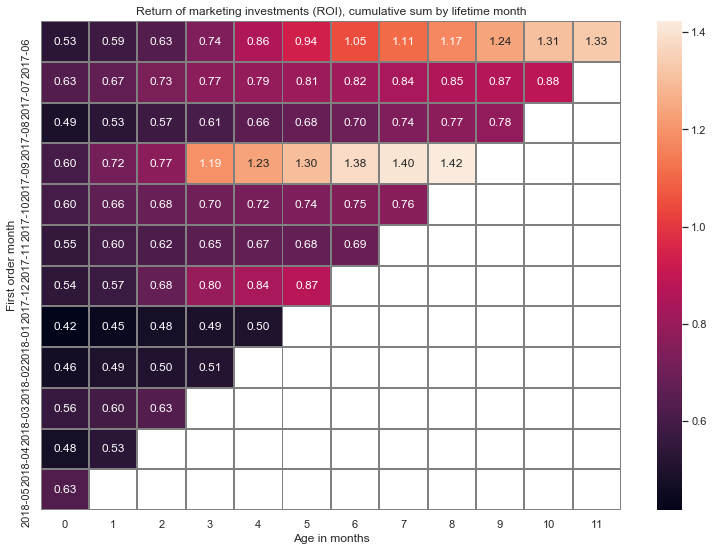

In [363]:
# plot pivot table with color
plt.figure(figsize=(13, 9))
plt.title('Return of marketing investments (ROI), cumulative sum by lifetime month')
sns.heatmap(
    roi_month_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey')
plt.show()

##### Conclusion

When neglecting the margin rate, we could find that the month cohorts june 2017 and september 2017 are the only two that have paid off within the observed year. The highest cumulated ROMI value in the heatmap is for the september cohort (1.42). There is a big jump from 0.77 in november to 1.19 in december. That's the field where we also observed an abnormal high value for average purchase size. <br> <br>
The june 2017 cohort had the slightly increasing trend in number of orders and in LTV between august and december; that can be seen in the ROMI values since they are increasing faster than for other cohorts. After one year, the june cohort has reached the second highest ROMI given by 1.33. After june and september cohorts, the third highest ROMI value was reached with 0.88 for the july cohort - after 10 months of lifetime. That's lower than 1, so it didn't pay off within 11 months.

<a id="5.3.2"></a>

#### 5.3.2) ROI by source ID

In [364]:
# create table with the first orders for every user
first_order_per_buyer = orders.groupby('user_id').agg({'order_date': 'min'}).reset_index()
first_order_per_buyer.columns = ['user_id', 'first_order_date']

# merge table 'df_cac' with the first order dates
df_cac = pd.merge(df_cac, first_order_per_buyer, on='user_id')

In [365]:
# extract first order month
df_cac['first_order_month'] = df_cac['first_order_date'].astype('datetime64[M]') 

# create Age in months as difference between first order and order
df_cac['Age in months'] = (df_cac['order_month']-df_cac['first_order_month']) / np.timedelta64(1, 'M')
df_cac['Age in months'] = df_cac['Age in months'].round().astype('int')

df_cac.head()

,order_date,revenue,user_id,order_month,ad_source_id,first_order_date,first_order_month,Age in months
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01 00:27:00,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01 00:29:00,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01 07:58:00,2017-06-01,0


In [366]:
# group by order source ID and Age and sum up all corresponding revenues
source_roi_cohorts = df_cac.groupby(['ad_source_id','Age in months']).agg({'revenue': 'sum'}).reset_index()

# rename columns
source_roi_cohorts.columns = ['source_id', 'Age in months', 'revenue_sum']

# add number of buyers for every cohort to create the cohort report
source_roi_report = pd.merge(cac_cohort_sizes, source_roi_cohorts, on='source_id')

# merge the table 'costs_per_source' with our report table
source_roi_report = pd.merge(source_roi_report, costs_per_source, on='source_id')

# calculate LTV
source_roi_report['LTV'] = source_roi_report['revenue_sum'] / source_roi_report['n_buyers']

# calculate CAC
source_roi_report['CAC'] = source_roi_report['ad_costs'] / source_roi_report['n_buyers']

# calculate ROMI
source_roi_report['ROI'] = source_roi_report['LTV'] / source_roi_report['CAC']

source_roi_report.head()

,source_id,n_buyers,Age in months,revenue_sum,ad_costs,LTV,CAC,ROI
0,1,2899,0,18103.37,20833.27,6.244695,7.186364,0.868964
1,1,2899,1,2671.98,20833.27,0.921690,7.186364,0.128255
2,1,2899,2,2282.85,20833.27,0.787461,7.186364,0.109577
3,1,2899,3,2110.42,20833.27,0.727982,7.186364,0.101300
4,1,2899,4,1172.91,20833.27,0.404591,7.186364,0.056300


In [367]:
roi_source_pivot = source_roi_report \
        .pivot_table( \
                index='source_id', \
                columns='Age in months', \
                values='ROI', \
                aggfunc='mean').cumsum(axis=1)

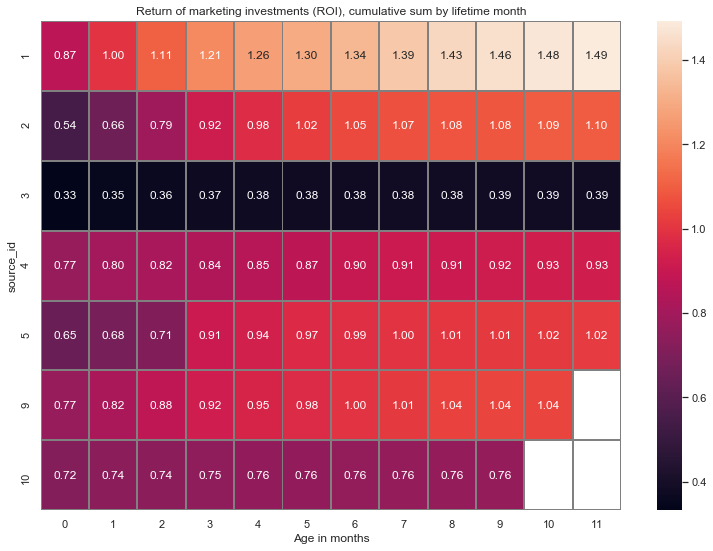

In [368]:
plt.figure(figsize=(13, 9))
plt.title('Return of marketing investments (ROI), cumulative sum by lifetime month')
sns.heatmap(
    roi_source_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey')
plt.show()

##### Conclusion

Here we can clearly see which ad sourced were more profitable than others. We can see clearly differences between the starting and the ending value for the Return of Marketing Investment after 1 year: <br> <br>
ID 1:    ROI from 0.87 to 1.49; difference of 0.62 <br> 
ID 2:    ROI from 0.54 to 1.10; difference of 0.56 <br>
ID 3:    ROI from 0.33 to 0.39; difference of 0.06 <br>
ID 4:    ROI from 0.77 to 0.93; difference of 0.16 <br>
ID 5:    ROI from 0.65 to 1.02; difference of 0.37 <br>
ID 9:    ROI from 0.77 to 1.04; difference of 0.27 <br>
ID 10: ROI from 0.72 to 0.76; difference of 0.04 <br> <br>
In generall one can see that the values in Age 0 are already pretty high with values varying from 0.33 (ID 3) to 0.87 (ID 1). ID 3 starts with a low ROI and ends with a low ROI of 0.39 after one year. ID 10 starts with a high ROI value of 0.72 but has a very low increase after one year (0.76). The biggest difference between Age 0 and Age 12 has ID 1 with a difference of 0.62. ID 1 is also the ad with the highest ROI at the end of the time period (1.49). The second highest difference is given by source ID 2 (0.56).

<a id="6"></a>

## 6) Overall Conclusion

In [369]:
print(cac_values_table['CAC'].sort_values().apply("{:.2f}".format))
print()
print(costs.groupby('ad_source_id').agg({'ad_costs': 'sum'})['ad_costs'].sort_values())

source_id
10     4.38
9      5.07
4      5.93
1      7.19
5      7.47
2     12.21
3     13.49
Name: CAC, dtype: object

ad_source_id
9       5517.49
10      5822.49
1      20833.27
2      42806.04
5      51757.10
4      61073.60
3     141321.63
Name: ad_costs, dtype: float64


In terms of devices, we observed a constantly higher number of sessions per user and day for desktop devices compared to touch devices. There was no identifiable increasing trend in that value for any of both devices. The average values for the whole year are 1.09 for desktop and 1.05 for touch devices. In total, we have more desktop sessions (262,565) than touch sessions (96,833). Also the lengths of sessions have similar distributions for both devices with the peak at 1 minute. Overall, the desktop platform is the dominating platform, so I recommend to focus on that platform. <br> <br>
In terms of user behaviour, we observed that the retention rates of users in different source cohorts decreased in time for all sources, so we will focus on the important metrics ROI and CAC to determine the most profitable ad sources: <br>
When looking at the plotted pivot table with ROI values for different source IDs, one can see that source ID 3 was the least profitable one. At the same time, significantly the highest marketing expenses is given for source 3 (141,321 dollars) having an average CAC of 13,49 dollars - this CAC is also the highest of all ad sources. Not only the cumulated ROI is important for each source ID but also the development from the first to the last lifetime month. Even though source 10 has the lowest average CAC, the development of ROI within the year is low (0.72 to 0.76 dollars). Source 9 has a slightly higher CAC (5.07 dollars) but a much better development over the year in ROI (0.77 to 1.04) than source 10. With a not too high CAC of 7.19 dollars source 1 has the highest ROI value of all ad sources within one year (ROI: from 0.87 to 1.49 within one year) and a good development in ROI. The development within the year for ad source 5 seems good, but there's a big jump between lifetime month 2 and 3. Source 2 is profitable since it has the second highest ROI after one year and its development is smooth even though it has the second highest average CAC (12.21 dollars).
Overall, these metrics lead to a recommendation to focus strongly on the ad sources with the IDs 1, 2 and 9. <br> <br>
After the observed year, the total sum of all ad costs is 329,132 dollars and the total sum of all revenues is 252,057 dollars. Assuming a margin rate of 50%, neglecting taxes and loans and other expenses we have a net loss of -203,103 dollars. 